In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

benign_df = pd.read_csv('/content/drive/MyDrive/5703 CP/archive-2/1.benign.csv')

g_c_df = pd.read_csv('/content/drive/MyDrive/5703 CP/archive-2/5.gafgyt.combo.csv')
g_j_df = pd.read_csv('/content/drive/MyDrive/5703 CP/archive-2/5.gafgyt.junk.csv')
g_s_df = pd.read_csv('/content/drive/MyDrive/5703 CP/archive-2/5.gafgyt.scan.csv')
g_t_df = pd.read_csv('/content/drive/MyDrive/5703 CP/archive-2/5.gafgyt.tcp.csv')
g_u_df = pd.read_csv('/content/drive/MyDrive/5703 CP/archive-2/5.gafgyt.udp.csv')
m_a_df = pd.read_csv('/content/drive/MyDrive/5703 CP/archive-2/5.mirai.ack.csv')
m_sc_df = pd.read_csv('/content/drive/MyDrive/5703 CP/archive-2/5.mirai.scan.csv')
m_sy_df = pd.read_csv('/content/drive/MyDrive/5703 CP/archive-2/5.mirai.syn.csv')
m_u_df = pd.read_csv('/content/drive/MyDrive/5703 CP/archive-2/5.mirai.udp.csv')
m_u_p_df = pd.read_csv('/content/drive/MyDrive/5703 CP/archive-2/5.mirai.udpplain.csv')

In [ ]:
benign_df['type'] = 'benign'
m_u_df['type'] = 'mirai_udp'
g_c_df['type'] = 'gafgyt_combo'
g_j_df['type'] = 'gafgyt_junk'
g_s_df['type'] = 'gafgyt_scan'
g_t_df['type'] = 'gafgyt_tcp'
g_u_df['type'] = 'gafgyt_udp'
m_a_df['type'] = 'mirai_ack'
m_sc_df['type'] = 'mirai_scan'
m_sy_df['type'] = 'mirai_syn'
m_u_p_df['type'] = 'mirai_udpplain'

In [ ]:

df = pd.concat([benign_df, m_u_df, g_c_df,
                g_j_df, g_s_df, g_t_df,
                g_u_df, m_a_df, m_sc_df,
                m_sy_df, m_u_p_df],
                axis=0, sort=False, ignore_index=True)

In [ ]:
df["type"].value_counts()

,count
type,
mirai_udp,156248
gafgyt_tcp,104510
gafgyt_udp,104011
mirai_scan,96781
mirai_syn,65746
gafgyt_combo,61380
mirai_ack,60554
mirai_udpplain,56681
benign,49548


<Axes: title={'center': 'Class Distribution'}>

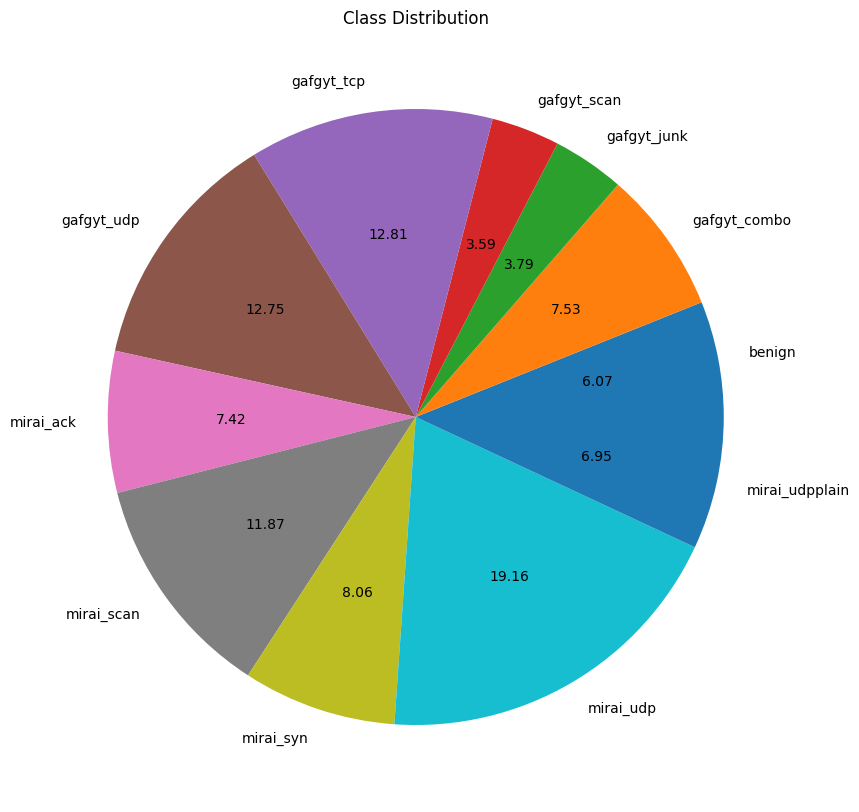

In [ ]:

from matplotlib import pyplot as plt

plt.title("Class Distribution")
df.groupby("type").size().plot(kind='pie', autopct='%.2f', figsize=(20,10))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815654 entries, 0 to 815653
Columns: 116 entries, MI_dir_L5_weight to type
dtypes: float64(115), object(1)
memory usage: 721.9+ MB


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
0,78.706905,60.002153,0.047363,96.156418,60.012447,0.273164,223.397726,60.050861,1.051944,2013.948356,...,0.000000e+00,0.000000e+00,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.0,mirai_scan
1,161.716622,74.065141,1.559298,272.661872,74.060140,1.484526,758.117465,74.083975,9.350736,6607.806247,...,0.000000e+00,0.000000e+00,1.679342,74.0,0.000000e+00,95.268043,0.000000e+00,0.000000e+00,0.0,gafgyt_combo
2,167.654709,74.006495,0.155829,277.499372,74.015073,0.361530,830.925381,74.032914,2.690302,7438.473121,...,0.000000e+00,0.000000e+00,1.000000,74.0,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.0,gafgyt_combo
3,1.000000,60.000003,0.000106,1.000088,60.003693,0.155085,1.129661,64.820632,179.228042,5.246159,...,3.720000e-29,5.780000e-17,5.953758,60.0,6.740000e-07,84.852814,4.550000e-13,4.240000e-29,0.0,benign
4,51.171348,225.154089,56290.925312,75.173745,218.146222,55004.969962,202.642986,250.705117,60099.769289,2834.934952,...,0.000000e+00,0.000000e+00,1.000000,566.0,0.000000e+00,566.000000,0.000000e+00,0.000000e+00,0.0,mirai_ack


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["type"])

In [ ]:
features = list(train_df.columns)
features.remove("type")
#features

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df["type"] = label_encoder.fit_transform(train_df["type"])
test_df["type"] = label_encoder.transform(test_df["type"])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])

In [ ]:
X_train = train_df[features].values
y_train = train_df["type"].values

X_test = test_df[features].values
y_test = test_df["type"].values

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


clf = ExtraTreesClassifier(n_estimators=50, n_jobs=-1)
clf = clf.fit(X_train, y_train)
clf.feature_importances_

array([1.37762019e-02, 9.21590054e-03, 1.65719017e-03, 9.83709954e-03,
       6.72277707e-03, 9.51263809e-03, 1.56987958e-02, 9.94569224e-03,
       9.59913769e-03, 3.51872902e-02, 3.72550009e-02, 2.99420408e-02,
       1.92429512e-02, 6.02948093e-02, 4.87678995e-02, 8.17920142e-03,
       9.57762656e-04, 5.10023675e-03, 1.85001783e-02, 9.47062196e-03,
       2.00583786e-03, 1.59154459e-02, 1.10649222e-02, 9.68054089e-03,
       3.99586493e-02, 3.20718088e-02, 2.67940492e-02, 3.08776995e-02,
       5.04461141e-02, 3.73912638e-02, 4.95173503e-03, 4.85453204e-03,
       7.25850168e-05, 5.84497090e-03, 2.77843425e-05, 6.51223381e-07,
       2.40554085e-06, 7.37421078e-03, 3.29119457e-03, 2.07971235e-04,
       3.61390419e-03, 1.04250488e-04, 1.00612474e-06, 1.77856498e-05,
       8.41807746e-03, 5.19889760e-03, 4.72261972e-04, 4.64669808e-03,
       1.82689239e-04, 2.26870336e-06, 2.50171975e-04, 1.81322493e-02,
       8.39679065e-03, 2.68617649e-03, 4.96610206e-03, 2.46071561e-04,
      

In [ ]:
ext=pd.DataFrame(clf.feature_importances_,columns=["extratrees_importance"])
ext = ext.sort_values(['extratrees_importance'], ascending=False)
feature_index = [features[i] for i in list(ext.index)]
ext["Feature_Name"] = feature_index
ext

,extratrees_importance,Feature_Name
13,6.029481e-02,MI_dir_L0.01_mean
28,5.044611e-02,H_L0.01_mean
14,4.876790e-02,MI_dir_L0.01_variance
24,3.995865e-02,H_L0.1_weight
29,3.739126e-02,H_L0.01_variance
...,...,...
35,6.512234e-07,HH_L5_covariance
93,4.804561e-07,HpHp_L3_pcc
92,2.188284e-07,HpHp_L3_covariance
106,1.539993e-07,HpHp_L0.1_covariance


In [ ]:
model = SelectFromModel(clf, prefit=True)
X_train = model.transform(X_train)
X_test = model.transform(X_test)
X_test.shape

(163131, 36)

In [ ]:
X_train = X_train.reshape((-1, X_train.shape[-1], 1))
X_test = X_test.reshape((-1, X_test.shape[-1], 1))

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=np.unique(y_train),
                                                 y=y_train)

class_weights = {k: v for k,v in enumerate(class_weights)}
class_weights

{0: 1.496550601121972,
 1: 1.2080537782517256,
 2: 2.399881573237023,
 3: 2.5309443095516992,
 4: 0.7095047450874644,
 5: 0.7129069298666337,
 6: 1.2245375539762757,
 7: 0.7661643232453694,
 8: 1.127826163607672,
 9: 0.47456977493458075,
 10: 1.3081987590092121}

In [ ]:
input_shape = X_train.shape[1:]
nb_classes = len(label_encoder.classes_)

In [ ]:
from tensorflow.keras.utils import to_categorical

def convert_to_categorical(y, nb_classes):
    return to_categorical(y, num_classes=nb_classes)

In [ ]:
def iid_data_indices(labels: np.ndarray, nb_clients: int):
    data_len = len(labels)
    indices = np.arange(data_len)
    np.random.shuffle(indices)
    chunks = np.array_split(indices, nb_clients)
    return chunks

In [ ]:
def non_iid_data_indices(labels: np.ndarray, nb_clients: int):
    data_len = len(labels)
    indices = np.arange(data_len)
    indices = indices[labels.argsort()]

    indices_end_list = []
    for i in range(0, nb_clients-1):
        y = random.randrange(data_len-2)
        indices_end_list.append(y)

    indices_end_list.sort()
    indices_end_list = indices_end_list+[data_len]

    indices_for_users = []
    prev_index = 0
#     sum_res = 0
    for curr_index in indices_end_list:
        indices_for_users.append(indices[prev_index:curr_index])
        prev_index = curr_index
#         sum_res += len(indices_for_users[-1])
#     print(sum_res, data_len)
    return indices_for_users

In [ ]:
def sample(y:np.ndarray, sampling_technique: str, nb_clients: int):
    if sampling_technique.lower() == "iid":
        sampler_fn = iid_data_indices
    else:
        sampler_fn = non_iid_data_indices
    client_data_indices = sampler_fn(y, nb_clients)
    return client_data_indices

In [ ]:
def assign_data_to_clients(clients: dict, X:np.ndarray, y:np.ndarray, nb_classes:int, sampling_technique: str):
    sampled_data_indices = sample(y, sampling_technique, len(clients.keys()))
    for client_name, data_indices in zip(clients.keys(), sampled_data_indices):
        X = X_train[data_indices]
        y = y_train[data_indices]
        y = convert_to_categorical(y, nb_classes)
        clients[client_name] = list(zip(X, y))
    return clients

In [ ]:
def create_clients(X, y, nb_classes, sampling_technique, num_clients=10, initial='clients'):
    #create a list of client names
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]
    clients = {client_names[i] : [] for i in range(len(client_names))}
    return assign_data_to_clients(clients, X, y, nb_classes, sampling_technique)

In [ ]:
import tensorflow as tf

def batch_data(data_shard, batch_size=64):
    #seperate shard into data and labels lists
    data, label = zip(*data_shard)
    del data_shard

    len_label = len(label)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    del data, label
    return dataset.shuffle(len_label).batch(batch_size)

In [ ]:
from keras.layers import Conv1D, MaxPool1D, BatchNormalization, Activation, Input, Add, \
                         GlobalAveragePooling1D, Dense, concatenate
from keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.metrics import Recall, Precision
import keras
import time
import os

In [ ]:
import pandas as pd
import random

# Assuming "df" is your dataset
#df = pd.DataFrame({'data': range(1000)})  # Replace this with your actual dataset
dataset_size = len(df)  # Total size of the dataset
num_clients = 9  # Number of clients in the FL system
num_shards = 2  # Number of shards for non-IID data

# Initialize global counters
total_iid_data_points = 0
total_non_iid_data_points = 0

# Define IID data partitioning function
def iid_data_indices(dataframe, num_clients):
    global total_iid_data_points
    data_per_client = len(dataframe) // num_clients
    all_indices = dataframe.index.tolist()
    random.shuffle(all_indices)
    client_indices = [
        all_indices[i * data_per_client:(i + 1) * data_per_client]
        for i in range(num_clients)
    ]
    # Increment the IID data counter
    total_iid_data_points += sum(len(indices) for indices in client_indices)
    return client_indices

# Define Non-IID data partitioning function
def non_iid_data_indices(dataframe, num_clients, num_shards):
    global total_non_iid_data_points
    all_indices = dataframe.index.tolist()
    random.shuffle(all_indices)
    shards_per_client = num_shards // num_clients
    client_indices = [[] for _ in range(num_clients)]

    # Divide data into shards and assign to clients
    shards = [
        all_indices[i * (len(dataframe) // num_shards):(i + 1) * (len(dataframe) // num_shards)]
        for i in range(num_shards)
    ]
    for i, shard in enumerate(shards):
        client_indices[i % num_clients].extend(shard)

    # Increment the Non-IID data counter
    total_non_iid_data_points += sum(len(indices) for indices in client_indices)
    return client_indices

# Run the IID data sampling process
iid_indices = iid_data_indices(df, num_clients)
print(f"IID Data Points Allocated: {total_iid_data_points}")

# Run the Non-IID data sampling process
non_iid_indices = non_iid_data_indices(df, num_clients, num_shards)
print(f"Non-IID Data Points Allocated: {total_non_iid_data_points}")

# Calculate total data points and proportions
total_data_points = total_iid_data_points + total_non_iid_data_points

if total_data_points > 0:
    percentage_iid = (total_iid_data_points / total_data_points) * 100
    percentage_non_iid = (total_non_iid_data_points / total_data_points) * 100
    print(f"Percentage of IID data: {percentage_iid:.2f}%")
    print(f"Percentage of Non-IID data: {percentage_non_iid:.2f}%")
else:
    print("No data points were allocated.")

IID Data Points Allocated: 815652
Non-IID Data Points Allocated: 815654
Percentage of IID data: 50.00%
Percentage of Non-IID data: 50.00%


In [ ]:
import random

# Initialize counters for data points
total_iid_data_points = 0
total_non_iid_data_points = 0

# Modify the iid_data_indices function
def iid_data_indices(dataset_size, num_clients):
    global total_iid_data_points
    data_per_client = dataset_size // num_clients
    all_indices = list(range(dataset_size))
    random.shuffle(all_indices)
    client_indices = [
        all_indices[i * data_per_client:(i + 1) * data_per_client]
        for i in range(num_clients)
    ]
    # Count IID data points
    total_iid_data_points += dataset_size
    return client_indices

# Modify the non_iid_data_indices function
def non_iid_data_indices(dataset, num_clients, num_shards=2):
    global total_non_iid_data_points
    dataset_size = len(dataset)
    all_indices = list(range(dataset_size))
    random.shuffle(all_indices)
    shards_per_client = (num_shards * num_clients) // num_clients
    client_indices = [[] for _ in range(num_clients)]

    shards = [
        all_indices[i * (dataset_size // (num_shards * num_clients)):(i + 1) * (dataset_size // (num_shards * num_clients))]
        for i in range(num_shards * num_clients)
    ]
    for i, shard in enumerate(shards):
        client_indices[i % num_clients].extend(shard)

    # Count Non-IID data points
    total_non_iid_data_points += dataset_size
    return client_indices

# Assuming 'df' is your DataFrame
dataset_size = len(df)  # Get the size of your dataset
num_clients = 9 # Define the number of clients

# Call the functions to simulate data assignment and update counters
iid_indices = iid_data_indices(dataset_size, num_clients)
non_iid_indices = non_iid_data_indices(df, num_clients)

# Calculate the proportions
total_data_points = total_iid_data_points + total_non_iid_data_points

# Add a check to avoid division by zero
if total_data_points != 0:
    percentage_iid = (total_iid_data_points / total_data_points) * 100
    percentage_non_iid = (total_non_iid_data_points / total_data_points) * 100
    print(f"Percentage of IID data: {percentage_iid:.2f}%")
    print(f"Percentage of Non-IID data: {percentage_non_iid:.2f}%")
else:
    print("No data points assigned. Please check your data and sampling functions.")

Percentage of IID data: 50.00%
Percentage of Non-IID data: 50.00%


In [ ]:
import tensorflow as tf
import keras.backend as K

def f1_score(y_true, y_pred):
    # Ensure y_true and y_pred have the same type
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())

    return f1_val


In [ ]:
from keras import layers
from keras.layers import Conv1D, MaxPooling1D, Concatenate, Activation, BatchNormalization

class INCEPTION_Block(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(INCEPTION_Block, self).__init__(**kwargs)
        self.kernel_size = 50
#         f1, f2_in, f2_out, f3_in, f3_out, f4_out = (128, 128, 192, 32, 96, 64)
        f1, f2_in, f2_out, f3_in, f3_out, f4_out = (16, 16, 24, 4, 12, 8)
        kernel_size_s = [10, 30, 50]

        # 1x1 conv
        self.conv_1_1 = Conv1D(f1, kernel_size_s[0], padding='same', activation='relu')

        # 3x3 conv
        self.conv_1_2 = Conv1D(f2_in, kernel_size_s[0], padding='same', activation='relu')
        self.conv_3_2 = Conv1D(f2_out, kernel_size_s[1], padding='same', activation='relu')

        # 5x5 conv
        self.conv_1_3 = Conv1D(f3_in, kernel_size_s[0], padding='same', activation='relu')
        self.conv_5_3 = Conv1D(f3_out, kernel_size_s[2], padding='same', activation='relu')

        # 3x3 max pooling
        self.pool = MaxPooling1D(kernel_size_s[1], strides=1, padding='same')
        self.conv_final = Conv1D(f4_out, kernel_size_s[0], padding='same', activation='relu')

        # concatenate filters, assumes filters/channels last
        self.concatenate = Concatenate(axis=-1)

        self.batch_normalization = BatchNormalization()
        self.relu_activation = Activation(activation='relu')

    def call(self, layer_in):
        # 1x1 conv
        conv1 = self.conv_1_1(layer_in)

        # 3x3 conv
        conv3 = self.conv_1_2(layer_in)
        conv3 = self.conv_3_2(conv3)

        # 5x5 conv
        conv5 = self.conv_1_3(layer_in)
        conv5 = self.conv_5_3(conv5)

        # 3x3 max pooling
        pool = self.pool(layer_in)
        pool = self.conv_final(pool)

        # concatenate filters, assumes filters/channels last
        layer_out = self.concatenate([conv1, conv3, conv5, pool])

        layer_out = self.batch_normalization(layer_out)
        layer_out = self.relu_activation(layer_out)

        return layer_out

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = keras.models.Sequential(
        [INCEPTION_Block(),
         INCEPTION_Block(),
         INCEPTION_Block()])(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

class TransformerEncoder(layers.Layer):
    def __init__(self, head_size, num_heads, neurons):
        super(TransformerEncoder, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=head_size)
        self.ffn = keras.models.Sequential(
            #[layers.Dense(neurons, activation="relu"), layers.Dense(head_size),]
            [
                INCEPTION_Block(),
                INCEPTION_Block(),
                INCEPTION_Block(),
            ]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(0.1)
        self.dropout2 = layers.Dropout(0.1)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

def get_model(input_shape, nb_classes) -> tf.keras.Model:
    head_size=64 # Embedding size for attention
    num_heads=3 # Number of attention heads
    ff_dim=128 # Hidden layer size in feed forward network inside transformer
    num_transformer_blocks=1
    mlp_units=[32]
    mlp_dropout=0.1
    dropout=0.1

    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(nb_classes, activation="softmax")(x)

    return keras.Model(inputs, outputs)

In [ ]:
from keras.metrics import Recall, Precision
from keras.utils import plot_model

learning_rate = 1e-2
comms_round = 15
loss='categorical_crossentropy'
metrics = ["accuracy", Recall(), Precision(), f1_score]
optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

#initialize global model
global_model = get_model(input_shape, nb_classes)

global_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 34, 1)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 34, 1)          │          1,345 │ input_layer[0][0],     │
│ (MultiHeadAttention)      │                        │                │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 34, 1)          │              0 │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 34, 1)          │              2 │ dropout_1[0][0]        │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 34, 1)          │              0 │ layer_normalization[0… │
│                           │                        │                │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 34, 60)         │         95,960 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 34, 60)         │              0 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_18 (Conv1D)        │ (None, 34, 1)          │             61 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 34, 1)          │              2 │ conv1d_18[0][0]        │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 34, 1)          │              0 │ layer_normalization_1… │
│                           │                        │                │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 34)             │              0 │ add_1[0][0]            │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 32)             │          1,120 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 32)             │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 11)             │            363 │ dropout_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 98,853 (386.14 KB)

 Trainable params: 98,493 (384.74 KB)

 Non-trainable params: 360 (1.41 KB)

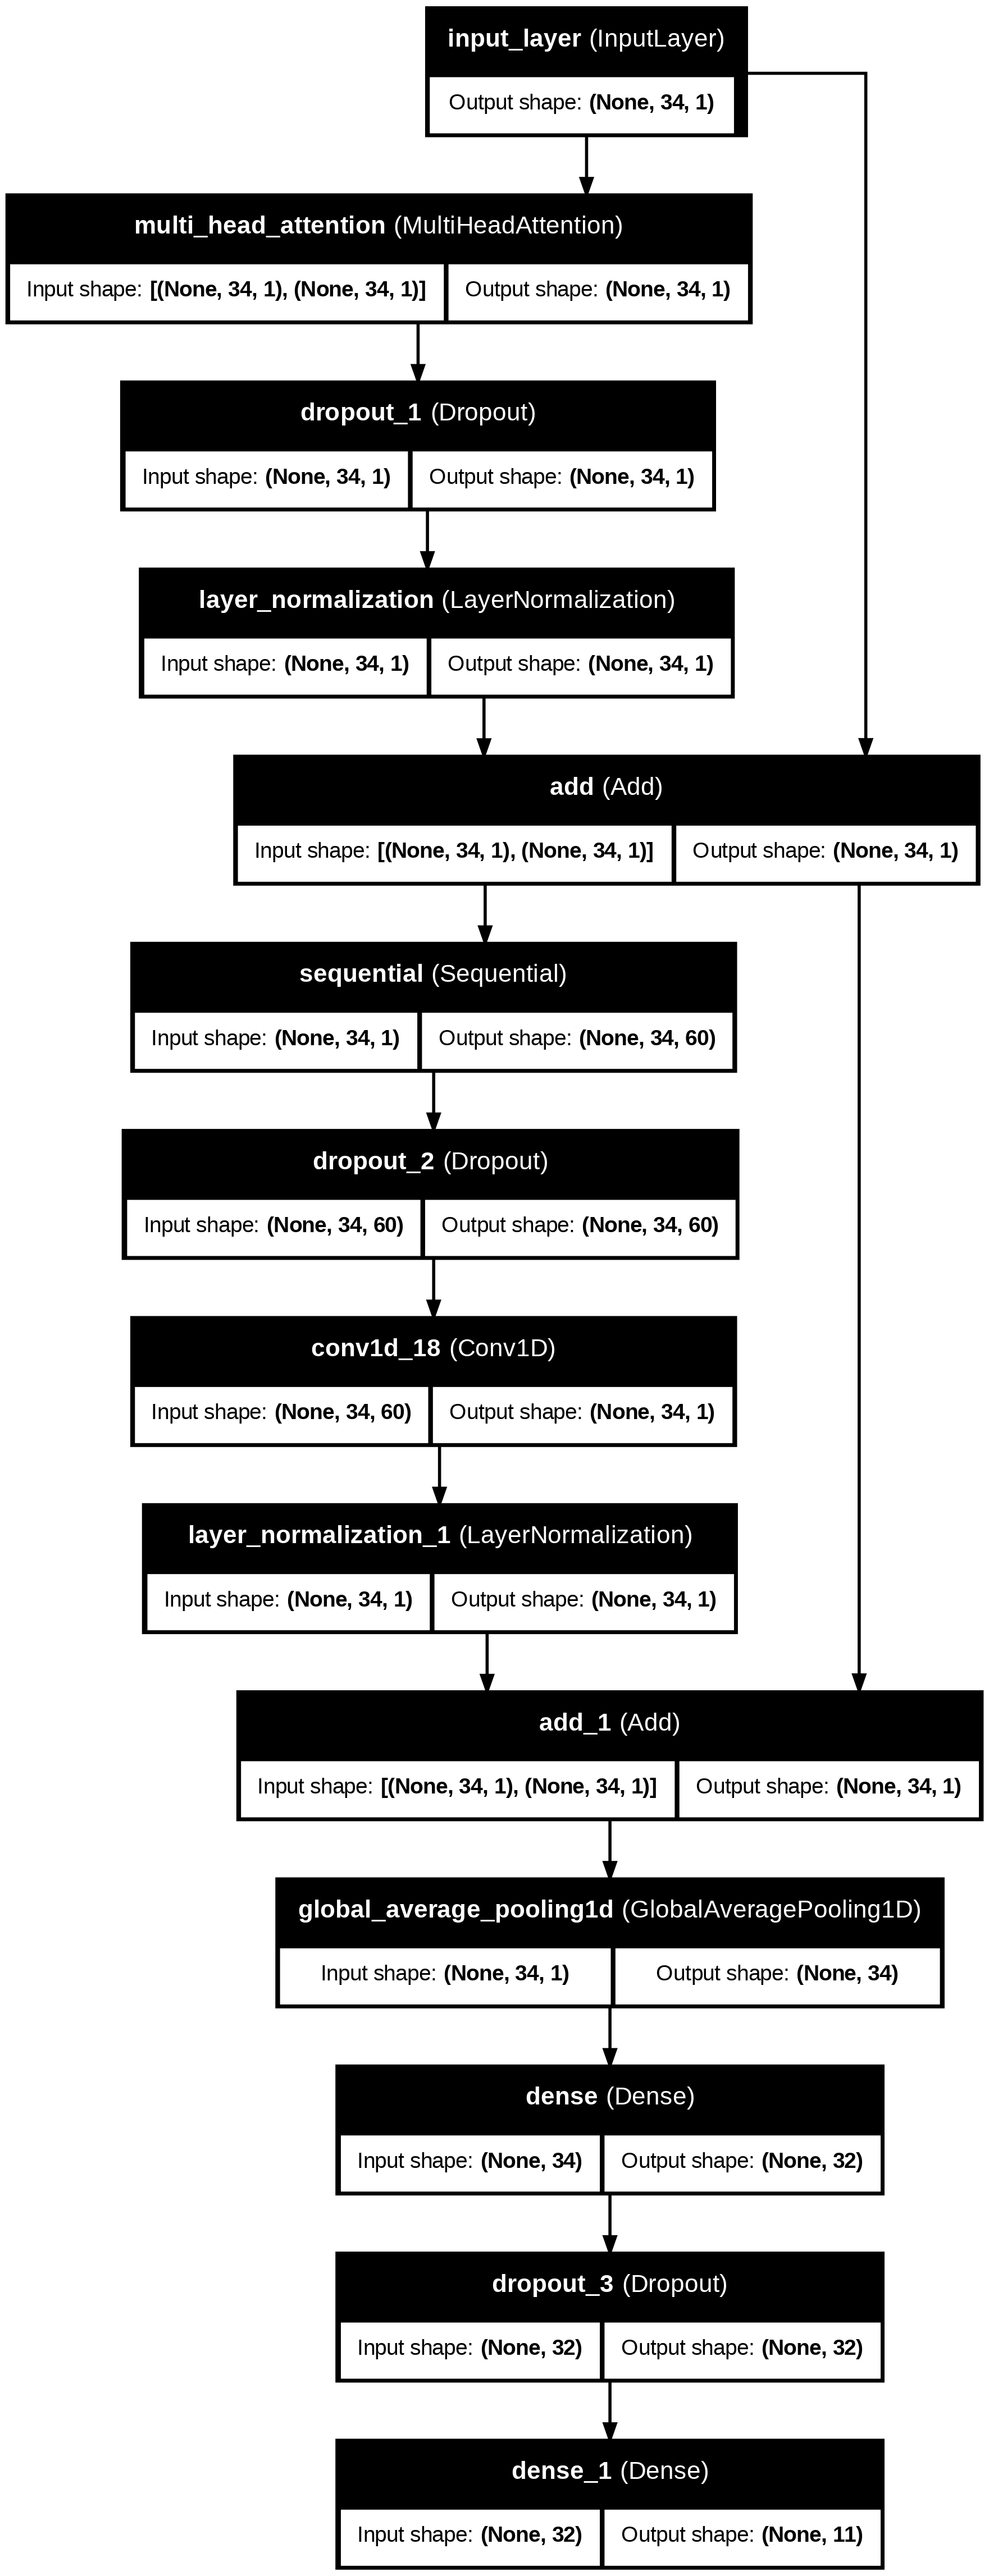

In [ ]:
plot_model(global_model, to_file='global_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
BATCH_SIZE = 16
sampling_technique = "iid"

# create clients
clients_batched = create_clients(X_train, y_train, nb_classes, sampling_technique, num_clients=10, initial='client')

#del X_train, y_train

# process and batch the training data for each client
client_set = {k: {} for k in clients_batched.keys()}

for (client_name, data) in clients_batched.items():
    client_set[client_name]["dataset"] = batch_data(data, BATCH_SIZE)
    local_model = get_model(input_shape, nb_classes)
    local_model.compile(loss=loss,
                      optimizer=optimizer,
                      metrics=metrics)
    client_set[client_name]["model"] = local_model

In [ ]:
#process and batch the test set

y_test = convert_to_categorical(y_test, nb_classes)

test_batched = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(len(y_test))

#del X_test, y_test

In [ ]:
def weight_scalling_factor(clients, client_name):
    client_names = list(clients.keys())
    #get the bs
    bs = list(clients[client_name]["dataset"])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients[client_name]["dataset"]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients[client_name]["dataset"]).numpy()*bs
    return local_count/global_count

In [ ]:
def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final

In [ ]:
def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)

    return avg_grad

In [ ]:
from sklearn.metrics import accuracy_score

def test_model(X_test, y_test,  model, comm_round):
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
    logits = model.predict(X_test)
    loss = cce(y_test, logits)
    y_hat = np.argmax(logits, axis=1)
    y_true = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(logits, axis=1))

    r = Recall()
    r.update_state(y_test, logits)
    recall = r.result().numpy()

    p = Precision()
    p.update_state(y_test, logits)
    precision = p.result().numpy()

    f = f1_score(y_test, logits)
    f1 = f.numpy()

    print('comm_round: {} | global_loss: {} | global_accuracy: {:.4} | global_recall: {:.4} | global_precision: {:.4} | global_f1_score: {:.4} \n'.format(comm_round, loss, accuracy, recall, precision, f1))
    return loss, accuracy, precision, recall, f1

In [ ]:
def train_client(client, global_weights, class_weights):
    # Initialize local model with the same architecture as the global model
    local_model = get_model(input_shape, nb_classes)
    local_model.set_weights(global_weights)  # Set the global model's weights

    # Reinitialize the optimizer
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

    # Compile the model with the new optimizer
    local_model.compile(loss='categorical_crossentropy',
                        optimizer=optimizer,
                        metrics=metrics)

    # Retrieve the dataset for the client
    client_dataset = client_set[client]["dataset"]

    # Fit the local model with the client's data
    if class_weights:
        local_model.fit(client_dataset, epochs=1, verbose=1, class_weight=class_weights)
    else:
        local_model.fit(client_dataset, epochs=1, verbose=1)

    # Scale the model weights and add to list
    scaling_factor = weight_scalling_factor(client_set, client)
    scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
    return scaled_weights


In [ ]:
import random

#commence global training loop
global_loss=[]
global_accuracy=[]
global_precision=[]
global_recall=[]
global_f1=[]
best_global_accuracy = 0

# Store the optimizer outside the loop
optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

for comm_round in range(comms_round):
    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()

    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= list(client_set.keys())
    random.shuffle(client_names)

    #loop through each client and create new local model
    for client in client_names:
        scaled_weights = train_client(client, global_weights, class_weights)

        scaled_local_weight_list.append(scaled_weights)

    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)

    #update global model
    global_model.set_weights(average_weights)

    # Recompile the global model after updating weights
    # This is crucial to ensure the optimizer recognizes the updated variables
    global_model.compile(optimizer=optimizer)  # Use the stored optimizer

    #test global model and print out metrics after each communications round
    g_accuracy = 0
    for(x_batch, y_batch) in test_batched:
        g_loss, g_accuracy, g_precision, g_recall, g_f1 = test_model(x_batch, y_batch, global_model, comm_round)
        global_loss.append(g_loss)
        global_accuracy.append(g_accuracy)
        global_precision.append(g_precision)
        global_recall.append(g_recall)
        global_f1.append(g_f1)

    if g_accuracy > best_global_accuracy:
        best_global_accuracy = g_accuracy
        global_model.save_weights('global_model_best_weights.weights.h5')
        print("New Weights Saved")

4079/4079 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - accuracy: 0.7274 - f1_score: 0.7004 - loss: 0.5264 - precision: 0.7597 - recall: 0.6763
4079/4079 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - accuracy: 0.7350 - f1_score: 0.7081 - loss: 0.5171 - precision: 0.7833 - recall: 0.7462
4079/4079 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 0.7342 - f1_score: 0.7107 - loss: 0.5162 - precision: 0.7855 - recall: 0.7516
4079/4079 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - accuracy: 0.7316 - f1_score: 0.7027 - loss: 0.5166 - precision: 0.7866 - recall: 0.7534
4079/4079 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - accuracy: 0.7316 - f1_score: 0.7015 - loss: 0.5243 - precision: 0.7875 - recall: 0.7548
4079/4079 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - accuracy: 0.7349 - f1_score: 0.7080 - loss: 0.5119 - precision: 0.7881 - recall: 0.7558
4079/4079 ━━━━━━━━━━━━━━━━━━━━ 34s 6ms/step - accuracy: 0.7371 - f1_score: 0.7100 - loss: 0.5157 - precision: 0.7887 - recall: 0.7569
4079/4079 ━━━━━━━━━━━━━━━━━━━━ 34s 6ms/step - accuracy: 0.7330

In [ ]:
global_model.load_weights("global_model_best_weights.weights.h5")


In [ ]:
loss, accuracy, precision, recall, f1_score = test_model(x_batch, y_batch, global_model, comm_round)
print("loss : ", loss.numpy())
print("accuracy : ", accuracy)
print("precision : ", precision)
print("recall : ", recall)
print("f1_score : ", f1_score)

5098/5098 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
comm_round: 14 | global_loss: 1.6823740005493164 | global_accuracy: 0.8587 | global_recall: 0.8586 | global_precision: 0.8587 | global_f1_score: 0.8587 

loss :  1.682374
accuracy :  0.8586718649428986
precision :  0.85870177
recall :  0.85862285
f1_score :  0.85866225


In [ ]:
for(x_batch, y_batch) in test_batched:
    logits = global_model.predict(x_batch)
    y_hat = np.argmax(logits, axis=1)
    y_true = np.argmax(y_batch, axis=1)

5098/5098 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn


def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))

    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))

    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))

In [ ]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

def ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, n_classes):
    lw = 3
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_ohe[:, i], y_hat_ohe[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_ohe.ravel(), y_hat_ohe.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(20, 20))
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="Micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="Macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(label_encoder.classes_[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate", fontsize=18)
    plt.ylabel("True Positive Rate", fontsize=18)
    plt.title("Multiclass ROC Curve", fontsize=24)
    plt.legend(loc="lower right", fontsize=22)
    plt.show()

In [ ]:
y_true_ohe = to_categorical(y_true, num_classes=len(label_encoder.classes_))
y_hat_ohe =  to_categorical(y_hat, num_classes=len(label_encoder.classes_))

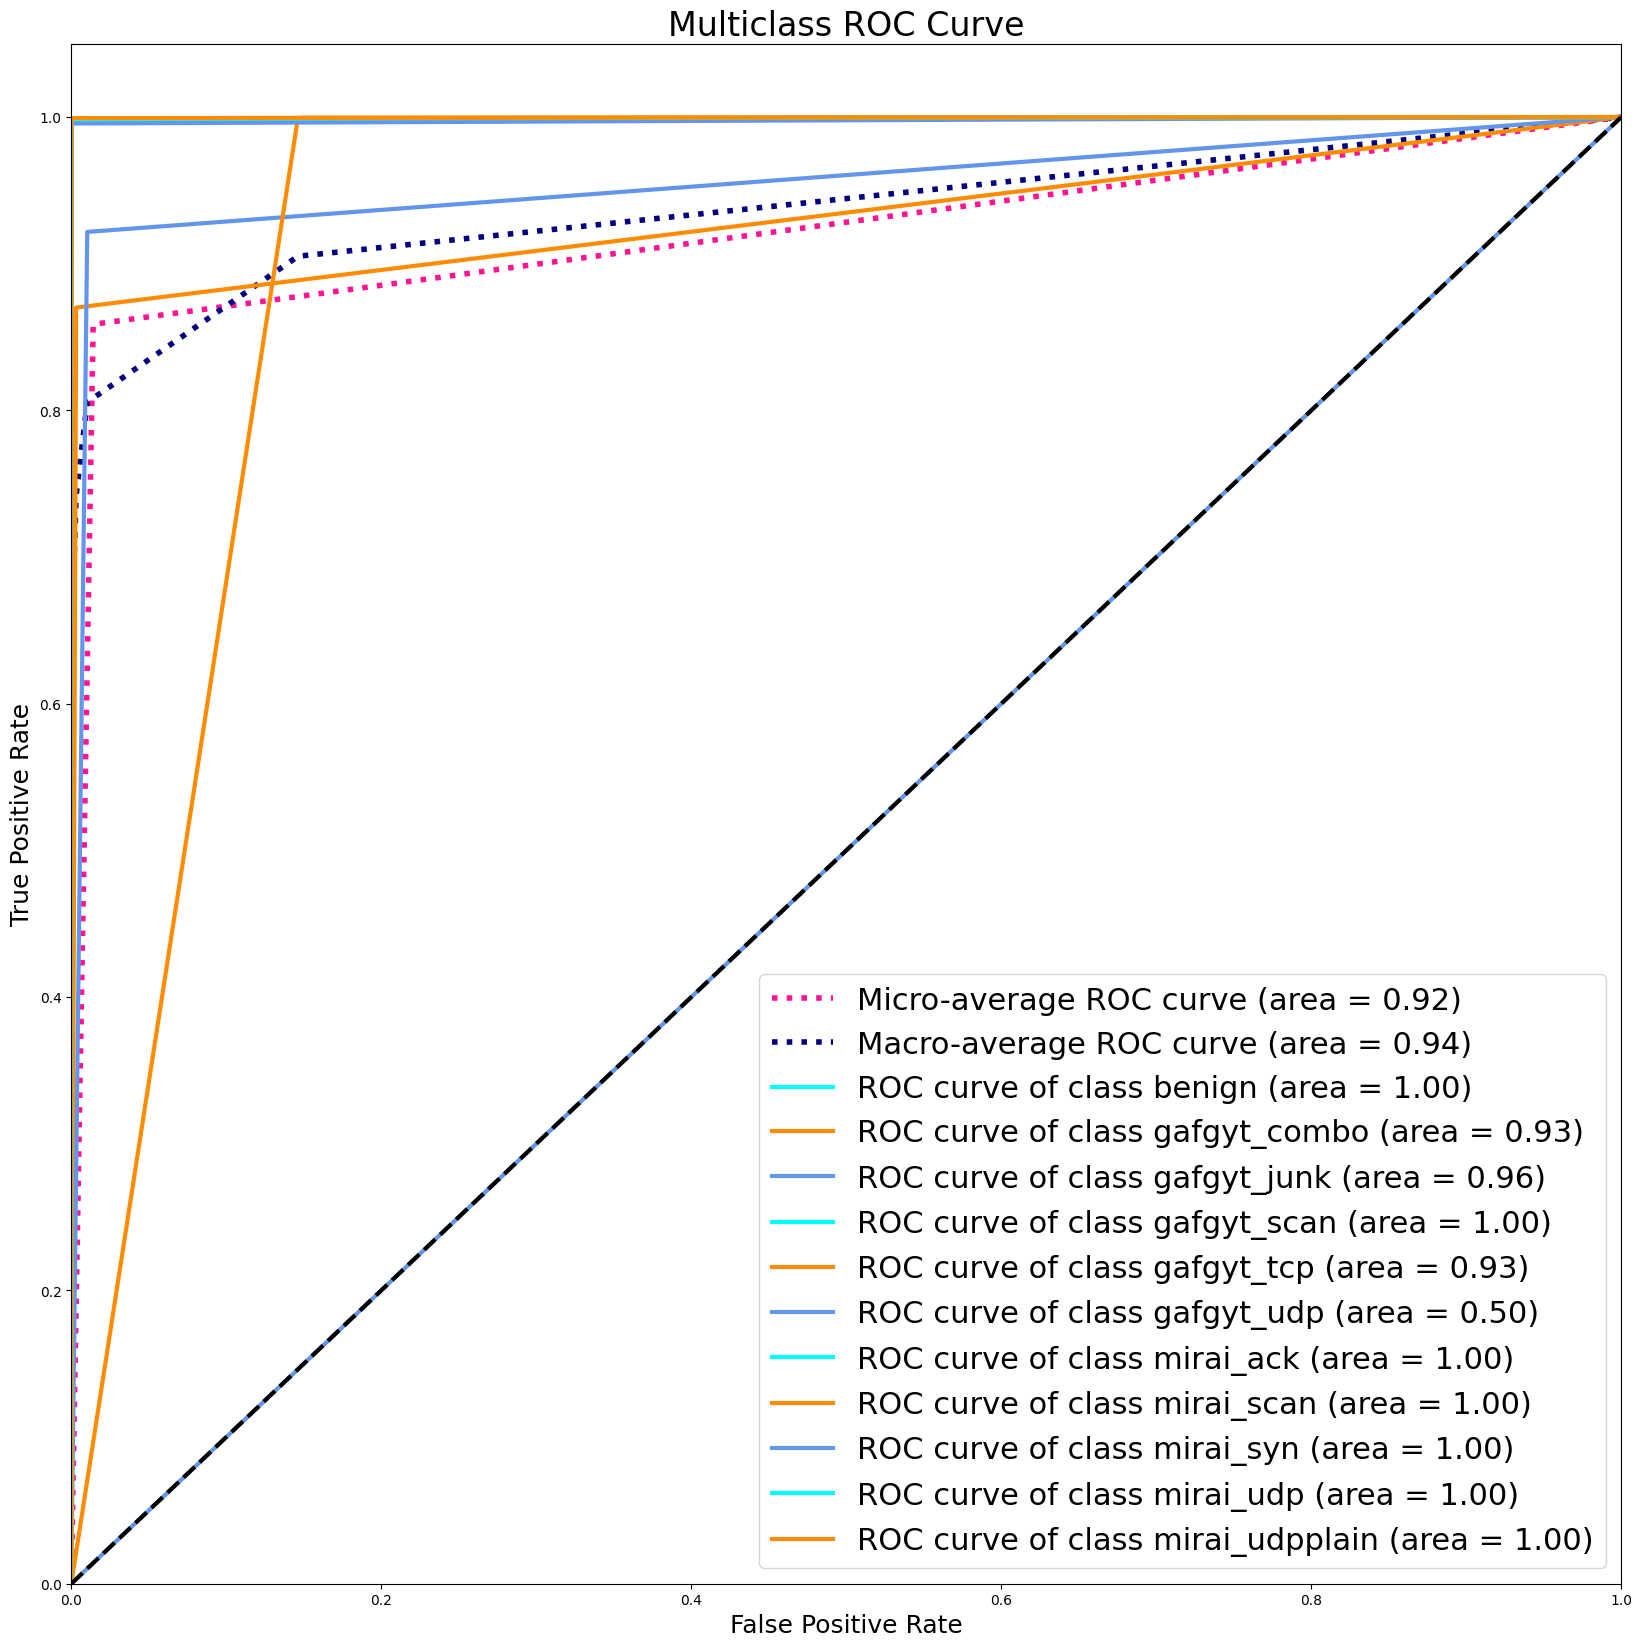

In [ ]:
ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, len(label_encoder.classes_))


Accuracy:  0.8586718649428986
Precision::  0.8586718649428986
Recall::  0.8586718649428986
F1_Score::  0.8586718649428986

Macro precision_recall_fscore_support (macro) average
(0.8470728018161438, 0.8889621685212924, 0.8556383261622945, None)

Macro precision_recall_fscore_support (micro) average
(0.8586718649428986, 0.8586718649428986, 0.8586718649428986, None)

Macro precision_recall_fscore_support (weighted) average
(0.8076976586668699, 0.8586718649428986, 0.816416092660013, None)

Confusion Matrix

Classification Report
                precision    recall  f1-score   support

        benign       1.00      1.00      1.00      9910
  gafgyt_combo       0.96      0.87      0.91     12276
   gafgyt_junk       0.78      0.92      0.84      6180
   gafgyt_scan       1.00      1.00      1.00      5859
    gafgyt_tcp       0.50      1.00      0.67     20902
    gafgyt_udp       0.09      0.00      0.00     20802
     mirai_ack       1.00      1.00      1.00     12111
    mirai_scan      

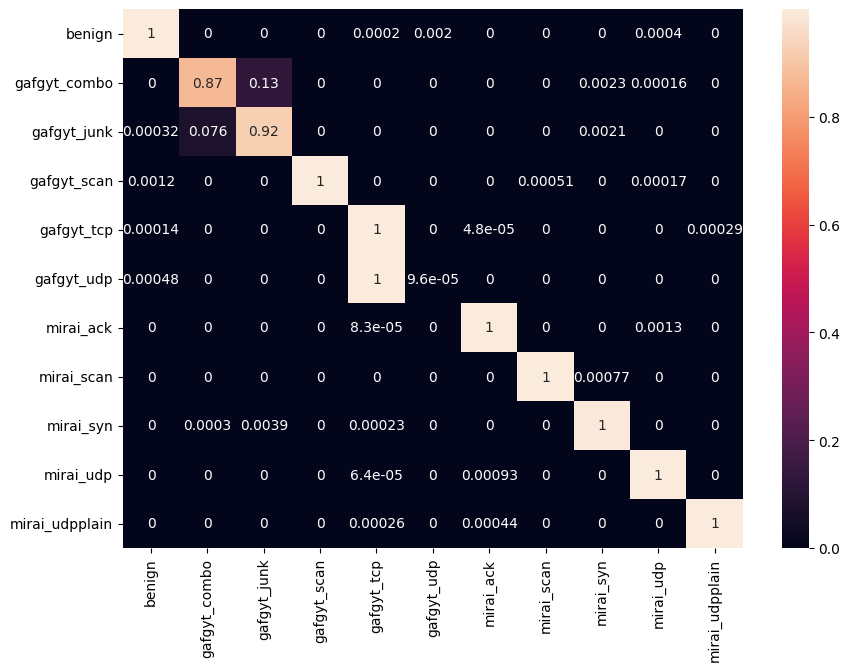

In [ ]:
print_score(y_hat, y_true, label_encoder)

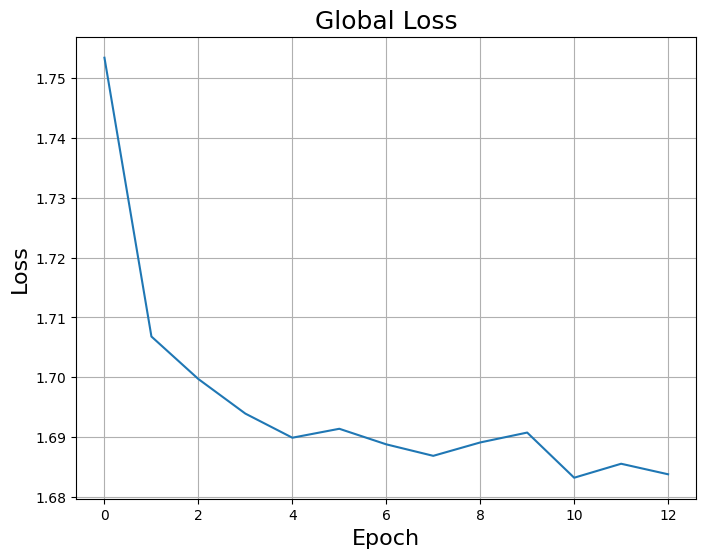

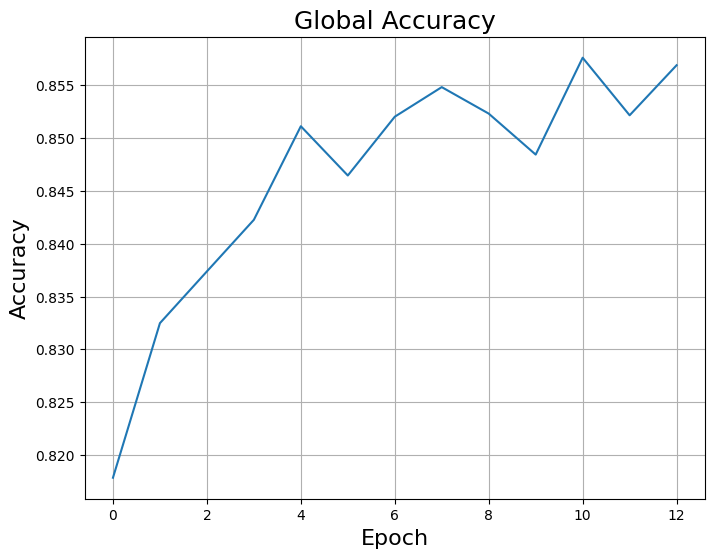

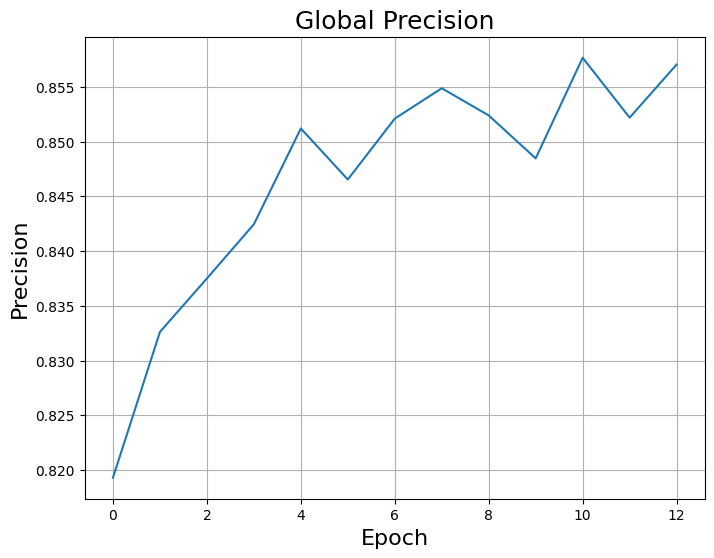

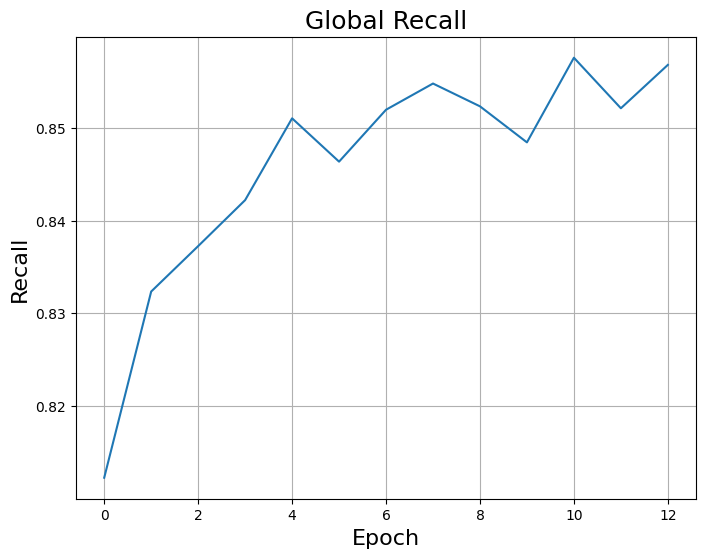

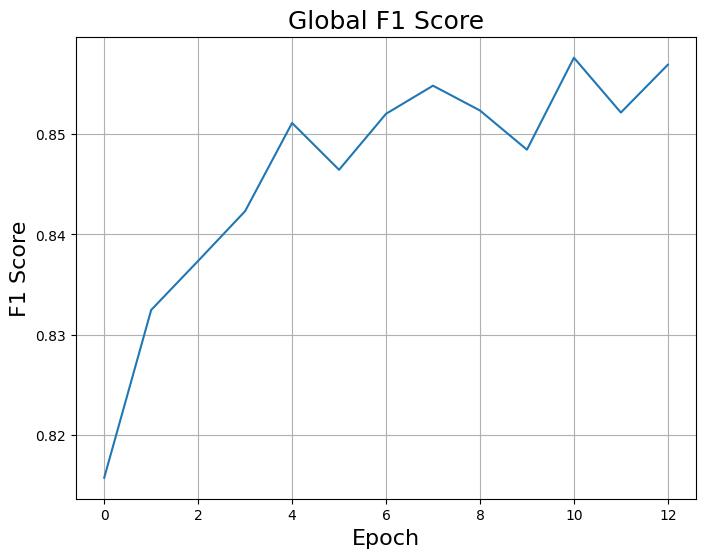

In [ ]:
import matplotlib.pyplot as plt

# Plot 1: Global Loss
plt.figure(figsize=(8, 6))
plt.plot(global_loss[:13])
plt.title("Global Loss", fontsize=18)
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.grid(True)
plt.show()

# Plot 2: Global Accuracy
plt.figure(figsize=(8, 6))
plt.plot(global_accuracy[:13])
plt.title("Global Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.grid(True)
plt.show()

# Plot 3: Global Precision
plt.figure(figsize=(8, 6))
plt.plot(global_precision[:13])
plt.title("Global Precision", fontsize=18)
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.grid(True)
plt.show()

# Plot 4: Global Recall
plt.figure(figsize=(8, 6))
plt.plot(global_recall[:13])
plt.title("Global Recall", fontsize=18)
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Recall", fontsize=16)
plt.grid(True)
plt.show()

# Plot 5: Global F1 Score
plt.figure(figsize=(8, 6))
plt.plot(global_f1[:13])
plt.title("Global F1 Score", fontsize=18)
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
from keras.models import Model
from keras.layers import Dense, Input

# Define the size of the input and the latent space
input_dim = X_train.shape[1]
encoding_dim = 64  # Can be tuned

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)  # Further compression

# Decoder
decoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')


In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=30,  # Adjust based on your data size and complexity
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))


Epoch 1/30
2549/2549 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0162 - val_loss: 1.1718e-04
Epoch 2/30
2549/2549 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0261e-04 - val_loss: 6.4453e-05
Epoch 3/30
2549/2549 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6.0266e-05 - val_loss: 4.4541e-05
Epoch 4/30
2549/2549 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.1681e-05 - val_loss: 3.7492e-05
Epoch 5/30
2549/2549 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.3677e-05 - val_loss: 3.3368e-05
Epoch 6/30
2549/2549 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.6468e-05 - val_loss: 2.4289e-05
Epoch 7/30
2549/2549 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.2589e-05 - val_loss: 2.0461e-05
Epoch 8/30
2549/2549 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.0235e-05 - val_loss: 1.7089e-05
Epoch 9/30
2549/2549 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.7887e-05 - val_loss: 1.7317e-05
Epoch 10/30
2549/2549 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.6578e-05 - val_loss: 1.4290e-05
Epoch 11/30
2549/2549 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Extract the encoder part
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)

# Transform training and test data
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)


20392/20392 ━━━━━━━━━━━━━━━━━━━━ 20s 982us/step
5098/5098 ━━━━━━━━━━━━━━━━━━━━ 5s 996us/step


In [ ]:
class INCEPTION_Block(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(INCEPTION_Block, self).__init__(**kwargs)
        self.kernel_size = 50
        f1, f2_in, f2_out, f3_in, f3_out, f4_out = (8, 8, 12, 4, 6, 4)
        kernel_size_s = [10, 20, 30]

        self.conv_1_1 = Conv1D(f1, kernel_size_s[0], padding='same', activation='relu')
        self.conv_1_2 = Conv1D(f2_in, kernel_size_s[0], padding='same', activation='relu')
        self.conv_3_2 = Conv1D(f2_out, kernel_size_s[1], padding='same', activation='relu')
        self.conv_1_3 = Conv1D(f3_in, kernel_size_s[0], padding='same', activation='relu')
        self.conv_5_3 = Conv1D(f3_out, kernel_size_s[2], padding='same', activation='relu')
        self.pool = MaxPooling1D(kernel_size_s[1], strides=1, padding='same')
        self.conv_final = Conv1D(f4_out, kernel_size_s[0], padding='same', activation='relu')
        self.concatenate = Concatenate(axis=-1)
        self.batch_normalization = BatchNormalization()
        self.relu_activation = Activation(activation='relu')

    def call(self, layer_in):
        conv1 = self.conv_1_1(layer_in)
        conv3 = self.conv_1_2(layer_in)
        conv3 = self.conv_3_2(conv3)
        conv5 = self.conv_1_3(layer_in)
        conv5 = self.conv_5_3(conv5)
        pool = self.pool(layer_in)
        pool = self.conv_final(pool)
        layer_out = self.concatenate([conv1, conv3, conv5, pool])
        layer_out = self.batch_normalization(layer_out)
        layer_out = self.relu_activation(layer_out)
        print(f"INCEPTION_Block output shape: {layer_out.shape}")
        return layer_out


In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Ensure the Dense layer output matches the residual connection dimensions
    x = layers.Dense(inputs.shape[-1], activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res


In [ ]:
import tensorflow as tf

def create_dataset(X, y, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    dataset = dataset.shuffle(buffer_size=1024)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

BATCH_SIZE = 16

train_dataset = create_dataset(X_train_encoded, y_train, BATCH_SIZE)
test_dataset = create_dataset(X_test_encoded, y_test, BATCH_SIZE)


In [ ]:
from tensorflow.keras.utils import to_categorical

# Number of classes
nb_classes = 11  # Make sure this matches your actual number of classes

# Convert labels to one-hot encoding
y_train_categorical = to_categorical(y_train, num_classes=nb_classes)

# If y_test is already one-hot encoded, you can skip re-encoding
if y_test.ndim == 2 and y_test.shape[1] == 11:
    y_test_categorical = y_test
else:
    # Ensure y_test is correctly one-hot encoded
    y_test_categorical = to_categorical(y_test, num_classes=11)

# Verify the shape of your categorical labels
print(f"Shape of y_train_categorical: {y_train_categorical.shape}")
print(f"Shape of y_test_categorical: {y_test_categorical.shape}")


Shape of y_train_categorical: (652523, 11)
Shape of y_test_categorical: (163131, 11)


In [ ]:
BATCH_SIZE = 16  # Adjust the batch size if necessary

# Create the datasets
train_dataset = create_dataset(X_train_encoded, y_train_categorical, BATCH_SIZE)
test_dataset = create_dataset(X_test_encoded, y_test_categorical, BATCH_SIZE)


In [ ]:
import tensorflow as tf

class CheckpointedModel(tf.keras.Model):
    def call(self, inputs, training=False):
        if training:
            return tf.recompute_gradients(super(CheckpointedModel, self).call, inputs)
        else:
            return super(CheckpointedModel, self).call(inputs)

def get_model_with_checkpointing(input_shape, nb_classes) -> tf.keras.Model:
    inputs = keras.Input(shape=(input_shape,))

    # Reshape the input to be 3D (for Conv1D layers)
    x = layers.Reshape((input_shape, 1))(inputs)

    x = INCEPTION_Block()(x)
    x = transformer_encoder(x, 64, 3, 128, dropout=0.1)
    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    x = layers.Dense(32, activation="relu")(x)
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(nb_classes, activation="softmax")(x)

    return CheckpointedModel(inputs, outputs)


In [ ]:
from tensorflow.keras import mixed_precision

# Set mixed precision policy
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Print the policy to confirm
print("Mixed precision policy:", mixed_precision.global_policy())


Mixed precision policy: <DTypePolicy "mixed_float16">


In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model_checkpoint.weights.h5',
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    verbose=1
)


In [ ]:
def get_model_with_simplifications(input_shape, nb_classes) -> tf.keras.Model:
    inputs = keras.Input(shape=(input_shape,))

    # Adjusting the INCEPTION_Block
    x = layers.Reshape((input_shape, 1))(inputs)
    x = INCEPTION_Block()(x)

    # Pooling and flattening
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(32, activation="relu")(x)
    x = layers.Dropout(0.1)(x)

    # Final output layer should match the number of classes
    outputs = layers.Dense(nb_classes, activation="softmax")(x)

    return keras.Model(inputs, outputs)

# Define input shape and number of classes
input_shape = X_train_encoded.shape[1]  # Should be the number of features (e.g., 64)
nb_classes = y_train_categorical.shape[-1]  # Should be 11, as we have 11 classes

# Create and compile the model
global_model = get_model_with_simplifications(input_shape, nb_classes)
global_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


INCEPTION_Block output shape: (None, 64, 30)
INCEPTION_Block output shape: (None, 64, 30)


In [ ]:
# Train the model
global_model.fit(train_dataset, validation_data=test_dataset, epochs=2, callbacks=[checkpoint_callback])


Epoch 1/2
INCEPTION_Block output shape: (None, 64, 30)
INCEPTION_Block output shape: (None, 64, 30)
40783/40783 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.3784INCEPTION_Block output shape: (None, 64, 30)

Epoch 1: val_loss improved from inf to 0.20513, saving model to model_checkpoint.weights.h5
40783/40783 ━━━━━━━━━━━━━━━━━━━━ 118s 3ms/step - accuracy: 0.7974 - loss: 0.3783 - val_accuracy: 0.8614 - val_loss: 0.2051
Epoch 2/2
40774/40783 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8646 - loss: 0.2008
Epoch 2: val_loss improved from 0.20513 to 0.18758, saving model to model_checkpoint.weights.h5
40783/40783 ━━━━━━━━━━━━━━━━━━━━ 106s 3ms/step - accuracy: 0.8646 - loss: 0.2008 - val_accuracy: 0.8683 - val_loss: 0.1876


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = global_model.evaluate(test_dataset)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Save the trained model
global_model.save('trained_global_model.h5')


10196/10196 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.8691 - loss: 0.1862


Test Loss: 0.1876, Test Accuracy: 0.8683


In [ ]:
# Assuming the autoencoder is already trained
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Ensure the labels are one-hot encoded
y_train_categorical = to_categorical(y_train, num_classes=11)
y_test_categorical = to_categorical(y_test, num_classes=11)


20392/20392 ━━━━━━━━━━━━━━━━━━━━ 20s 970us/step
5098/5098 ━━━━━━━━━━━━━━━━━━━━ 5s 938us/step


In [ ]:
# Use the encoder part of the autoencoder to encode the training and test data
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Reshape the encoded data to match the expected input shape for the model
X_train_encoded = X_train_encoded.reshape((-1, X_train_encoded.shape[-1], 1))
X_test_encoded = X_test_encoded.reshape((-1, X_test_encoded.shape[-1], 1))

# Update input shape to match the encoded features
input_shape = X_train_encoded.shape[1:]

20392/20392 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step
5098/5098 ━━━━━━━━━━━━━━━━━━━━ 5s 986us/step


In [ ]:
# Reshape the encoded data to match the expected input shape
X_train_encoded = X_train_encoded.reshape(-1, 64, 1)
X_test_encoded = X_test_encoded.reshape(-1, 64, 1)

In [ ]:
def get_model_with_encoder(input_shape, nb_classes) -> tf.keras.Model:
    head_size = 64
    num_heads = 3
    ff_dim = 128
    num_transformer_blocks = 1
    mlp_units = [32]
    mlp_dropout = 0.1
    dropout = 0.1

    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(nb_classes, activation="softmax")(x)

    return keras.Model(inputs, outputs)

In [ ]:
input_shape = (35, 1)  # Update to match the encoded data shape

In [ ]:
# Create clients using the encoded features
clients_batched = create_clients(X_train_encoded, y_train, nb_classes, sampling_technique)

# Process and batch the training data for each client
client_set = {k: {} for k in clients_batched.keys()}

for client_name, data in clients_batched.items():
    client_set[client_name]["dataset"] = batch_data(data, BATCH_SIZE)
    local_model = get_model_with_encoder(input_shape, nb_classes)
    local_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=metrics)
    client_set[client_name]["model"] = local_model

In [ ]:
# Define global model
global_model = get_model_with_encoder(input_shape, nb_classes)
global_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define local models for each client
for client_name, data in clients_batched.items():
    local_model = get_model_with_encoder(input_shape, nb_classes)
    local_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=metrics)
    client_set[client_name]["model"] = local_model

In [ ]:
# Define the global model with the correct input shape
input_shape = (64, 1)  # Adjust to match the encoded data shape
global_model = get_model_with_encoder(input_shape, nb_classes)

# Similarly, define the local models
for client_name, data in clients_batched.items():
    client_set[client_name]["model"] = get_model_with_encoder(input_shape, nb_classes)

In [ ]:
# Check client data shapes before training
for client_name, client_info in client_set.items():
    dataset = client_info["dataset"]
    for X_batch, y_batch in dataset.take(1):
        print(f"Client {client_name} data shape: X: {X_batch.shape}, y: {y_batch.shape}")

Client clients_1 data shape: X: (16, 33, 1), y: (16, 11)
Client clients_2 data shape: X: (16, 33, 1), y: (16, 11)
Client clients_3 data shape: X: (16, 33, 1), y: (16, 11)
Client clients_4 data shape: X: (16, 33, 1), y: (16, 11)
Client clients_5 data shape: X: (16, 33, 1), y: (16, 11)
Client clients_6 data shape: X: (16, 33, 1), y: (16, 11)
Client clients_7 data shape: X: (16, 33, 1), y: (16, 11)
Client clients_8 data shape: X: (16, 33, 1), y: (16, 11)
Client clients_9 data shape: X: (16, 33, 1), y: (16, 11)
Client clients_10 data shape: X: (16, 33, 1), y: (16, 11)


In [ ]:
# Initialize global weights
global_weights = global_model.get_weights()

# Set the initial weights for each local model
for client_name, client_info in client_set.items():
    client_info["model"].set_weights(global_weights)

In [ ]:
# Federated learning training loop
for comm_round in range(comms_round):
    global_weights = global_model.get_weights()
    scaled_local_weight_list = []

    client_names = list(client_set.keys())
    random.shuffle(client_names)

    for client in client_names:
        scaled_weights = train_client(client, global_weights, class_weights)
        scaled_local_weight_list.append(scaled_weights)

    average_weights = sum_scaled_weights(scaled_local_weight_list)
    global_model.set_weights(average_weights)
    global_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

    # Only capture the first two results (loss and accuracy)
    test_loss, test_accuracy = global_model.evaluate(test_batched)[0:2]

    # Print the results
    print(f"Round {comm_round} - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

ValueError: Input 0 of layer "functional_179" is incompatible with the layer: expected shape=(None, 35, 1), found shape=(None, 33)

In [ ]:
# Assuming the autoencoder is already trained
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Print the number of features after encoding
print(f"Number of features after encoding (X_train): {X_train_encoded.shape[1]}")
print(f"Number of features after encoding (X_test): {X_test_encoded.shape[1]}")

# Dynamically determine the number of features
num_features = X_train_encoded.shape[1]

# Reshape the encoded data to match the expected input shape for the model
X_train_encoded = X_train_encoded.reshape((-1, num_features, 1))
X_test_encoded = X_test_encoded.reshape((-1, num_features, 1))

# Update input shape to match the encoded features
input_shape = (num_features, 1)

20392/20392 ━━━━━━━━━━━━━━━━━━━━ 19s 951us/step
5098/5098 ━━━━━━━━━━━━━━━━━━━━ 5s 937us/step
Number of features after encoding (X_train): 64
Number of features after encoding (X_test): 64


In [ ]:
def get_model_with_encoder(input_shape, nb_classes) -> tf.keras.Model:
    head_size = 64
    num_heads = 3
    ff_dim = 128
    num_transformer_blocks = 1
    mlp_units = [32]
    mlp_dropout = 0.1
    dropout = 0.1

    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(nb_classes, activation="softmax")(x)

    return keras.Model(inputs, outputs)

In [ ]:
# Create clients using the encoded features
clients_batched = create_clients(X_train_encoded, y_train_categorical, nb_classes, sampling_technique)

# Process and batch the training data for each client
client_set = {k: {} for k in clients_batched.keys()}

for client_name, data in clients_batched.items():
    client_set[client_name]["dataset"] = batch_data(data, BATCH_SIZE)
    local_model = get_model_with_encoder(input_shape, nb_classes)
    local_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    client_set[client_name]["model"] = local_model

In [ ]:
# Check client data shapes before training
for client_name, client_info in client_set.items():
    dataset = client_info["dataset"]
    for X_batch, y_batch in dataset.take(1):
        print(f"Client {client_name} data shape: X: {X_batch.shape}, y: {y_batch.shape}")

Client clients_1 data shape: X: (16, 33, 1), y: (16, 11)
Client clients_2 data shape: X: (16, 33, 1), y: (16, 11)
Client clients_3 data shape: X: (16, 33, 1), y: (16, 11)
Client clients_4 data shape: X: (16, 33, 1), y: (16, 11)
Client clients_5 data shape: X: (16, 33, 1), y: (16, 11)
Client clients_6 data shape: X: (16, 33, 1), y: (16, 11)
Client clients_7 data shape: X: (16, 33, 1), y: (16, 11)
Client clients_8 data shape: X: (16, 33, 1), y: (16, 11)
Client clients_9 data shape: X: (16, 33, 1), y: (16, 11)
Client clients_10 data shape: X: (16, 33, 1), y: (16, 11)


In [ ]:
# Define global model
global_model = get_model_with_encoder(input_shape, nb_classes)
global_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize global weights
global_weights = global_model.get_weights()

# Set the initial weights for each local model
for client_name, client_info in client_set.items():
    client_info["model"].set_weights(global_weights)

In [ ]:
def create_clients(data, labels, nb_classes, sampling_technique):
    print(f"Initial data shape in create_clients: {data.shape}")  # Debugging output

    # Example logic to create clients (Modify as per your actual logic)
    clients = {}
    data_len = len(data)
    indices = np.arange(data_len)

    # Simple IID splitting example
    for i in range(nb_classes):
        client_name = f"clients_{i+1}"
        client_indices = indices[i::nb_classes]  # This is a simple example
        client_data = data[client_indices]
        client_labels = labels[client_indices]

        print(f"{client_name} data shape: {client_data.shape}")  # Debugging output

        clients[client_name] = (client_data, client_labels)

    return clients


def batch_data(data, batch_size):
    X, y = data
    print(f"Data shape in batch_data before batching: X: {X.shape}, y: {y.shape}")  # Debugging output

    # Assuming TensorFlow batching
    batched_dataset = tf.data.Dataset.from_tensor_slices((X, y)).batch(batch_size)

    return batched_dataset

In [ ]:
# Assuming the autoencoder is already trained
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Reshape the encoded data to match the expected input shape for the model
X_train_encoded = X_train_encoded.reshape((-1, 64, 1))  # Shape is now (N, 64, 1)
X_test_encoded = X_test_encoded.reshape((-1, 64, 1))

# Ensure the labels are one-hot encoded
y_train_categorical = to_categorical(y_train, num_classes=11)
y_test_categorical = to_categorical(y_test, num_classes=11)

# Define the consistent input shape
input_shape = (64, 1)

# Create clients using the encoded features
clients_batched = create_clients(X_train_encoded, y_train_categorical, nb_classes, sampling_technique)

# Process and batch the training data for each client
client_set = {k: {} for k in clients_batched.keys()}

for client_name, data in clients_batched.items():
    print(f"Preparing {client_name} with data shape: X: {data[0].shape}, y: {data[1].shape}")  # Debugging output

    client_set[client_name]["dataset"] = batch_data(data, BATCH_SIZE)
    local_model = get_model_with_encoder(input_shape, nb_classes)
    local_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    client_set[client_name]["model"] = local_model

# Check client data shapes before training
for client_name, client_info in client_set.items():
    dataset = client_info["dataset"]
    for X_batch, y_batch in dataset.take(1):
        print(f"Client {client_name} data shape: X: {X_batch.shape}, y: {y_batch.shape}")

20392/20392 ━━━━━━━━━━━━━━━━━━━━ 20s 984us/step
5098/5098 ━━━━━━━━━━━━━━━━━━━━ 5s 960us/step
Initial data shape in create_clients: (652523, 64, 1)
clients_1 data shape: (59321, 64, 1)
clients_2 data shape: (59321, 64, 1)
clients_3 data shape: (59321, 64, 1)
clients_4 data shape: (59320, 64, 1)
clients_5 data shape: (59320, 64, 1)
clients_6 data shape: (59320, 64, 1)
clients_7 data shape: (59320, 64, 1)
clients_8 data shape: (59320, 64, 1)
clients_9 data shape: (59320, 64, 1)
clients_10 data shape: (59320, 64, 1)
clients_11 data shape: (59320, 64, 1)
Preparing clients_1 with data shape: X: (59321, 64, 1), y: (59321, 11)
Data shape in batch_data before batching: X: (59321, 64, 1), y: (59321, 11)
Preparing clients_2 with data shape: X: (59321, 64, 1), y: (59321, 11)
Data shape in batch_data before batching: X: (59321, 64, 1), y: (59321, 11)
Preparing clients_3 with data shape: X: (59321, 64, 1), y: (59321, 11)
Data shape in batch_data before batching: X: (59321, 64, 1), y: (59321, 11)
Pre

In [ ]:
# Federated learning training loop
for comm_round in range(comms_round):
    global_weights = global_model.get_weights()
    scaled_local_weight_list = []

    client_names = list(client_set.keys())
    random.shuffle(client_names)

    for client in client_names:
        scaled_weights = train_client(client, global_weights, class_weights)
        scaled_local_weight_list.append(scaled_weights)

    average_weights = sum_scaled_weights(scaled_local_weight_list)
    global_model.set_weights(average_weights)
    global_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



3708/3708 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8099 - f1_score: 0.8091 - loss: 0.3016 - precision: 0.8102 - recall: 0.7975
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8099 - f1_score: 0.8091 - loss: 0.3072 - precision: 0.8103 - recall: 0.7978
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8075 - f1_score: 0.8068 - loss: 0.3033 - precision: 0.8105 - recall: 0.7980
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8094 - f1_score: 0.8087 - loss: 0.2965 - precision: 0.8106 - recall: 0.7982
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8172 - f1_score: 0.8163 - loss: 0.2991 - precision: 0.8107 - recall: 0.7985
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8148 - f1_score: 0.8141 - loss: 0.2953 - precision: 0.8108 - recall: 0.7987
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8109 - f1_score: 0.8104 - loss: 0.3079 - precision: 0.8109 - recall: 0.7989
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8126

In [ ]:
# Evaluate the global model after each round
evaluation_results = global_model.evaluate(test_batched, verbose=0)
test_loss = evaluation_results[0]  # Loss is usually the first value
test_accuracy = evaluation_results[1]  # Accuracy is usually the second
print(f"Round {comm_round} - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


ValueError: Input 0 of layer "functional_244" is incompatible with the layer: expected shape=(None, 64, 1), found shape=(None, 33)

In [ ]:
import tensorflow as tf

# Proximal term calculation
def proximal_term(local_weights, global_weights, mu):
    prox_term = []
    for lw, gw in zip(local_weights, global_weights):
        prox_penalty = mu * (lw - gw)
        prox_term.append(prox_penalty)
    return prox_term

In [ ]:
def train_client_fedprox(client, global_weights, class_weights, mu):
    # Initialize local model with the same architecture as the global model
    local_model = get_model(input_shape, nb_classes)
    local_model.set_weights(global_weights)  # Set the global model's weights

    # Compile the local model
    local_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=metrics)

    # Retrieve the dataset for the client
    client_dataset = client_set[client]["dataset"]

    # Fit the local model with the client's data
    local_model.fit(client_dataset, epochs=1, verbose=1)

    # Get local weights and compute the proximal term
    local_weights = local_model.get_weights()
    prox_penalty = proximal_term(local_weights, global_weights, mu)

    # Apply the proximal term to the local weights
    new_weights = []
    for lw, penalty in zip(local_weights, prox_penalty):
        new_weights.append(lw - penalty)

    # Scale the modified local weights and return them
    scaling_factor = weight_scalling_factor(client_set, client)
    scaled_weights = scale_model_weights(new_weights, scaling_factor)

    return scaled_weights

In [ ]:
import random

# Commence global training loop
global_loss = []
global_accuracy = []
global_precision = []
global_recall = []
global_f1 = []
best_global_accuracy = 0

# Store the optimizer outside the loop
optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

for comm_round in range(comms_round):
    # Get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()

    # Initial list to collect local model weights after scaling
    scaled_local_weight_list = list()

    # Randomize client data - using keys
    client_names = list(client_set.keys())
    random.shuffle(client_names)

    # Loop through each client and create new local model
    for client in client_names:
        scaled_weights = train_client_fedprox(client, global_weights, class_weights, mu=0.1)
        scaled_local_weight_list.append(scaled_weights)

    # To get the average over all the local models, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)

    # Update global model
    global_model.set_weights(average_weights)

    # Recreate the optimizer after updating weights (to avoid the "unknown variable" issue)
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    global_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=metrics)

    # Test global model and print out metrics after each communications round
    g_accuracy = 0
    for (x_batch, y_batch) in test_batched:
        g_loss, g_accuracy, g_precision, g_recall, g_f1 = test_model(x_batch, y_batch, global_model, comm_round)
        global_loss.append(g_loss)
        global_accuracy.append(g_accuracy)
        global_precision.append(g_precision)
        global_recall.append(g_recall)
        global_f1.append(g_f1)

    if g_accuracy > best_global_accuracy:
        best_global_accuracy = g_accuracy
        global_model.save_weights('global_model_best_weights_fedprox.weights.h5')
        print("New Weights Saved")

# Load the best model for evaluation
global_model.load_weights('global_model_best_weights_fedprox.weights.h5')

4079/4079 ━━━━━━━━━━━━━━━━━━━━ 47s 7ms/step - accuracy: 0.6407 - f1_score: 0.5410 - loss: 0.8918 - precision: 0.7477 - recall: 0.4770
4079/4079 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - accuracy: 0.6402 - f1_score: 0.5350 - loss: 0.9009 - precision: 0.7612 - recall: 0.5950
4079/4079 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - accuracy: 0.6364 - f1_score: 0.5403 - loss: 0.8991 - precision: 0.7614 - recall: 0.6071
4079/4079 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.6404 - f1_score: 0.5354 - loss: 0.9053 - precision: 0.7618 - recall: 0.6114
4079/4079 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - accuracy: 0.6357 - f1_score: 0.5314 - loss: 0.9053 - precision: 0.7615 - recall: 0.6135
4079/4079 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.6429 - f1_score: 0.5470 - loss: 0.8991 - precision: 0.7612 - recall: 0.6158
4079/4079 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - accuracy: 0.6422 - f1_score: 0.5342 - loss: 0.8983 - precision: 0.7616 - recall: 0.6167
4079/4079 ━━━━━━━━━━━━━━━━━━━━ 46s 7ms/step - accuracy: 0.6360

In [ ]:
# Load the best model
global_model.load_weights("global_model_best_weights_fedprox.weights.h5")

# Evaluate the model on the test set
loss, accuracy, precision, recall, f1_score = test_model(x_batch, y_batch, global_model, comm_round)
print("loss : ", loss.numpy())
print("accuracy : ", accuracy)
print("precision : ", precision)
print("recall : ", recall)
print("f1_score : ", f1_score)

# Predict using the global model
for (x_batch, y_batch) in test_batched:
    logits = global_model.predict(x_batch)
    y_hat = np.argmax(logits, axis=1)
    y_true = np.argmax(y_batch, axis=1)

5098/5098 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
comm_round: 14 | global_loss: 1.6915855407714844 | global_accuracy: 0.8644 | global_recall: 0.8641 | global_precision: 0.8646 | global_f1_score: 0.8644 

loss :  1.6915855
accuracy :  0.8643544145502694
precision :  0.86456466
recall :  0.864146
f1_score :  0.8643552
5098/5098 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


Accuracy:  0.8643544145502694
Precision::  0.8643544145502694
Recall::  0.8643544145502694
F1_Score::  0.8643544145502694
Confusion Matrix
Classification Report
                precision    recall  f1-score   support

        benign       1.00      1.00      1.00      9910
  gafgyt_combo       0.96      0.95      0.95     12276
   gafgyt_junk       0.91      0.91      0.91      6180
   gafgyt_scan       1.00      1.00      1.00      5859
    gafgyt_tcp       0.50      1.00      0.67     20902
    gafgyt_udp       1.00      0.00      0.00     20802
     mirai_ack       1.00      0.99      0.99     12111
    mirai_scan       1.00      1.00      1.00     19356
     mirai_syn       1.00      1.00      1.00     13149
     mirai_udp       1.00      1.00      1.00     31250
mirai_udpplain       1.00      1.00      1.00     11336

      accuracy                           0.86    163131
     macro avg       0.94      0.90      0.87    163131
  weighted avg       0.93      0.86      0.82    1631

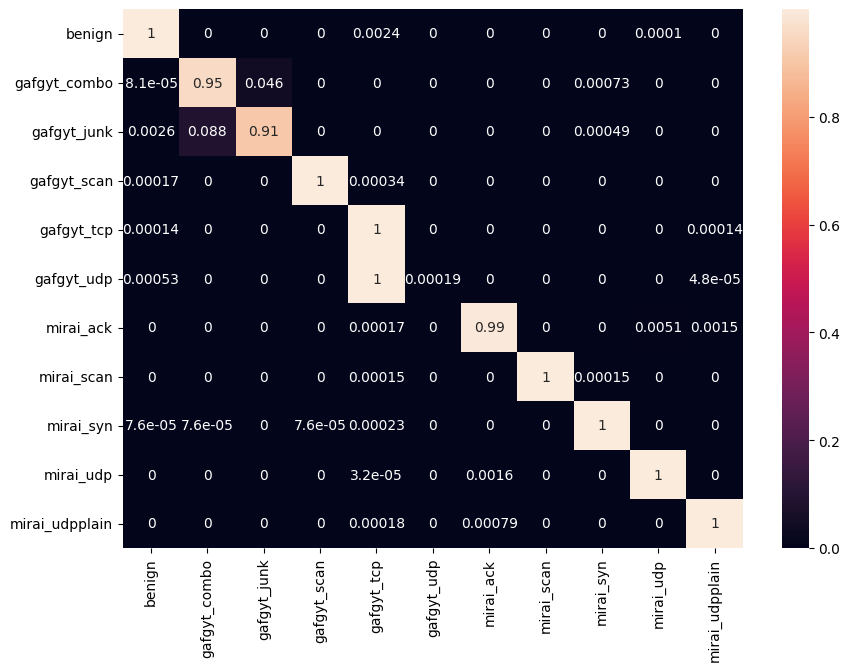

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn
import matplotlib.pyplot as plt

def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))

    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))

# Call print_score to display the results
print_score(y_hat, y_true, label_encoder)

In [ ]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

def ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, n_classes):
    lw = 3
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_ohe[:, i], y_hat_ohe[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_ohe.ravel(), y_hat_ohe.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(20, 20))
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="Micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="Macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(label_encoder.classes_[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate", fontsize=18)
    plt.ylabel("True Positive Rate", fontsize=18)
    plt.title("Multiclass ROC Curve", fontsize=24)
    plt.legend(loc="lower right", fontsize=22)
    plt.show()

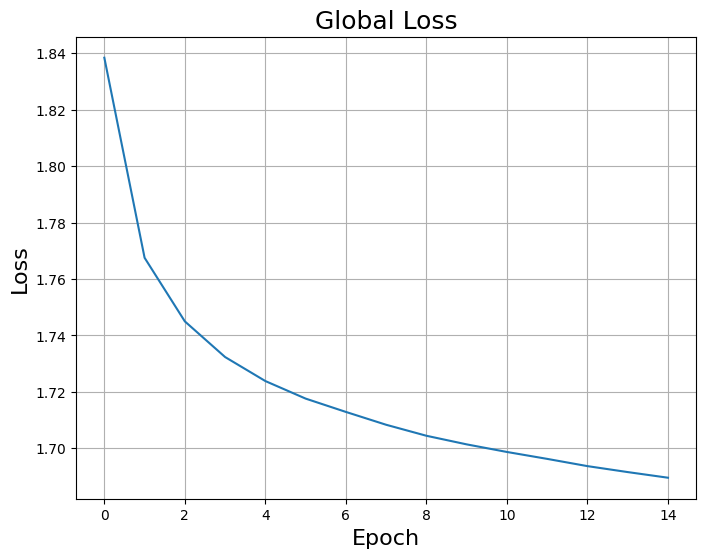

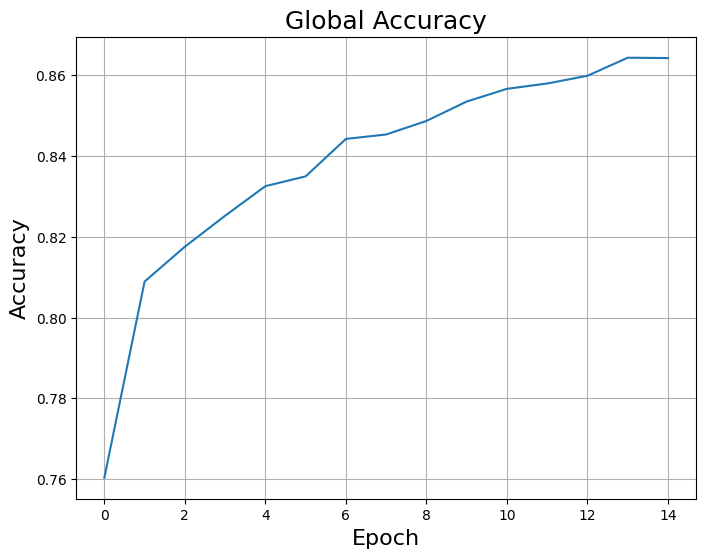

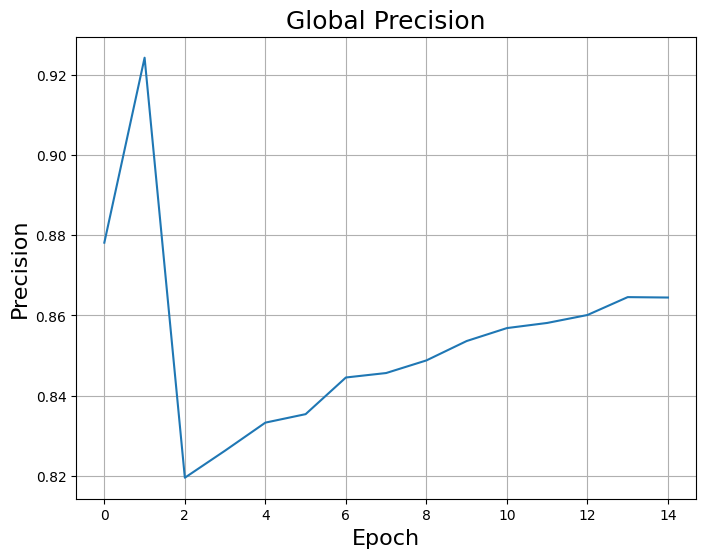

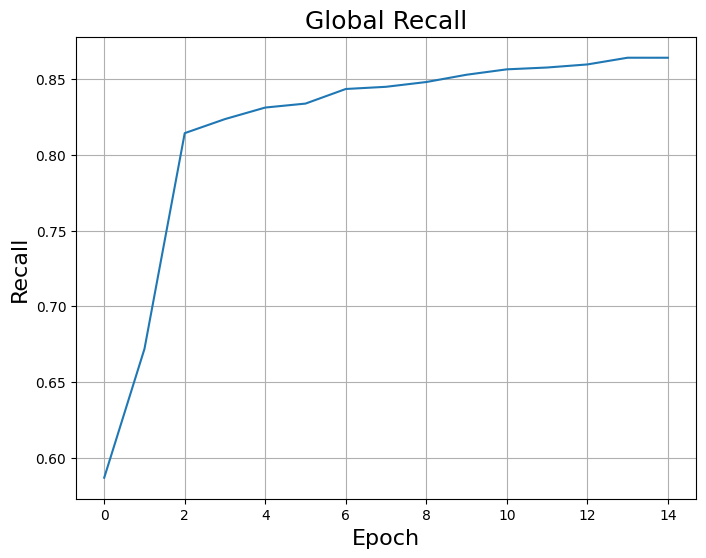

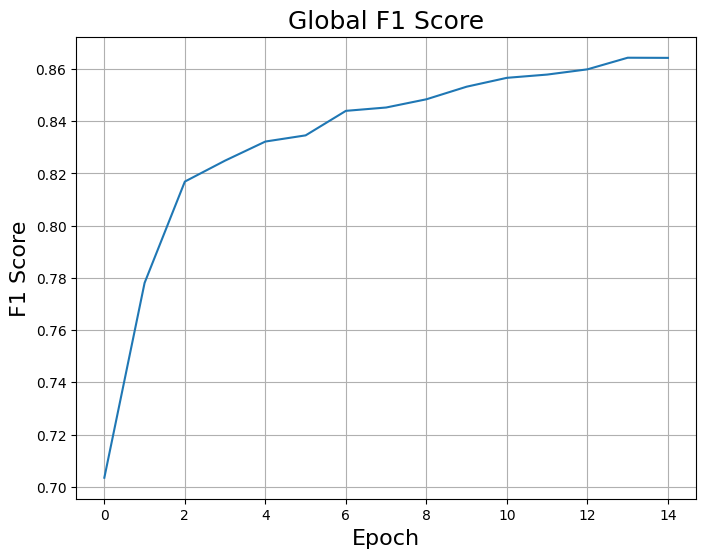

In [ ]:
import matplotlib.pyplot as plt

# Plot 1: Global Loss
plt.figure(figsize=(8, 6))
plt.plot(global_loss)
plt.title("Global Loss", fontsize=18)
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.grid(True)
plt.show()

# Plot 2: Global Accuracy
plt.figure(figsize=(8, 6))
plt.plot(global_accuracy)
plt.title("Global Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.grid(True)
plt.show()

# Plot 3: Global Precision
plt.figure(figsize=(8, 6))
plt.plot(global_precision)
plt.title("Global Precision", fontsize=18)
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.grid(True)
plt.show()

# Plot 4: Global Recall
plt.figure(figsize=(8, 6))
plt.plot(global_recall)
plt.title("Global Recall", fontsize=18)
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Recall", fontsize=16)
plt.grid(True)
plt.show()

# Plot 5: Global F1 Score
plt.figure(figsize=(8, 6))
plt.plot(global_f1)
plt.title("Global F1 Score", fontsize=18)
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
y_true_ohe = to_categorical(y_true, num_classes=len(label_encoder.classes_))
y_hat_ohe =  to_categorical(y_hat, num_classes=len(label_encoder.classes_))

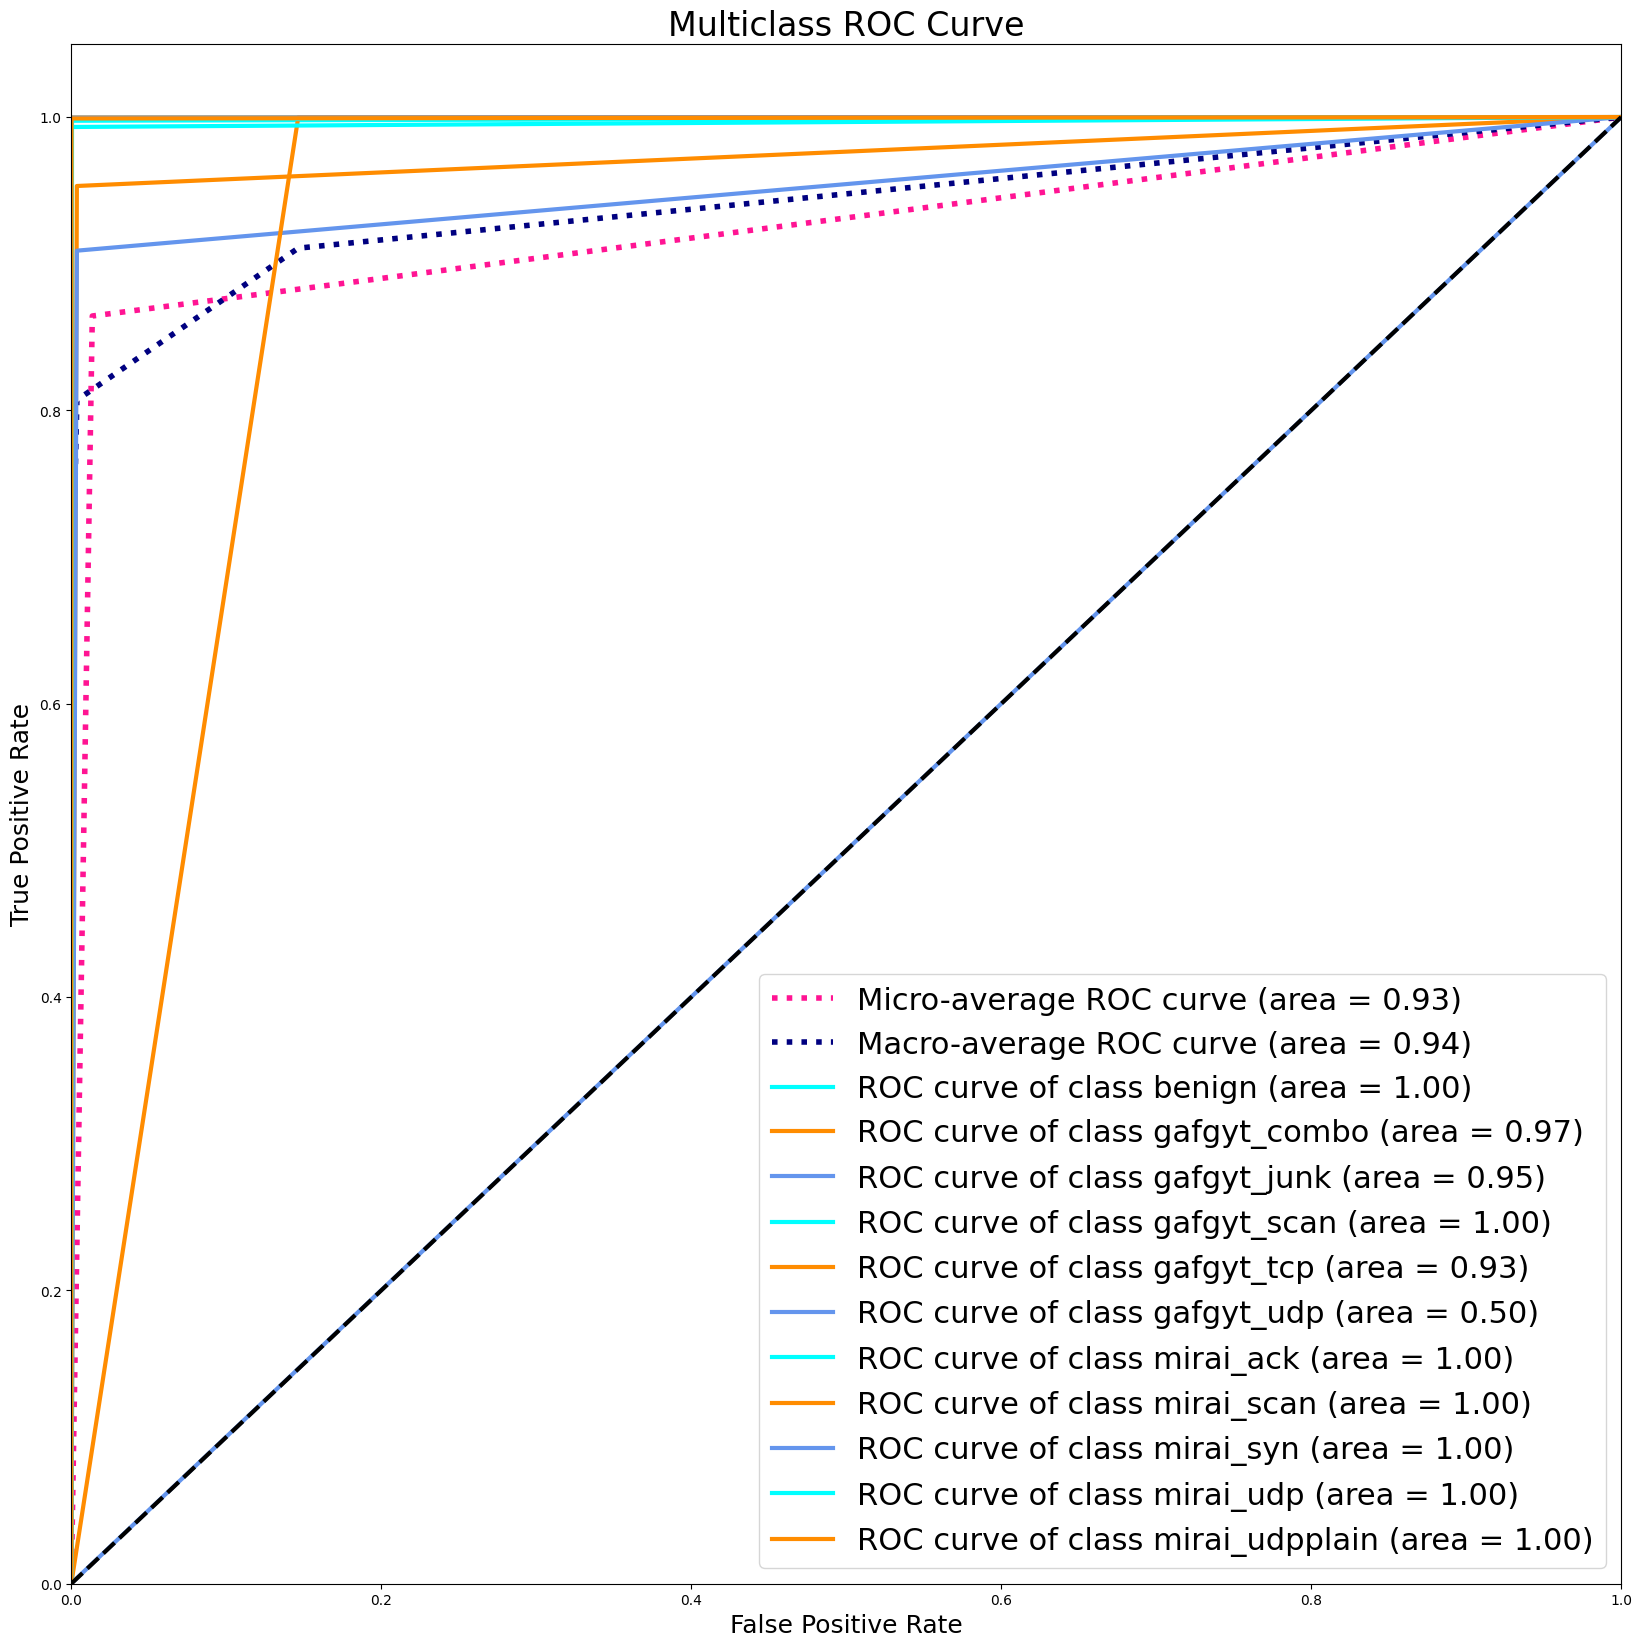

In [ ]:
ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, len(label_encoder.classes_))


In [ ]:
import random
for comm_round in range(comms_round):
    global_weights = global_model.get_weights()
    scaled_local_weight_list = []

    client_names = list(client_set.keys())
    random.shuffle(client_names)

    for client in client_names:
        scaled_weights = train_client_fedprox(client, global_weights, class_weights, mu=0.1)
        scaled_local_weight_list.append(scaled_weights)

    average_weights = sum_scaled_weights(scaled_local_weight_list)
    global_model.set_weights(average_weights)
    global_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)
    # Only capture the first two results (loss and accuracy)
    test_loss, test_accuracy = global_model.evaluate(test_batched)[0:2]

    # Print the results
    print(f"Round {comm_round} - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


4079/4079 ━━━━━━━━━━━━━━━━━━━━ 49s 7ms/step - accuracy: 0.5946 - f1_score: 0.4758 - loss: 1.0139 - precision: 0.7145 - recall: 0.4067
4079/4079 ━━━━━━━━━━━━━━━━━━━━ 50s 8ms/step - accuracy: 0.6011 - f1_score: 0.4905 - loss: 0.9804 - precision: 0.7515 - recall: 0.5579
4079/4079 ━━━━━━━━━━━━━━━━━━━━ 49s 8ms/step - accuracy: 0.6045 - f1_score: 0.4968 - loss: 0.9784 - precision: 0.7524 - recall: 0.5768
4079/4079 ━━━━━━━━━━━━━━━━━━━━ 48s 8ms/step - accuracy: 0.6037 - f1_score: 0.4977 - loss: 0.9802 - precision: 0.7530 - recall: 0.5848
4079/4079 ━━━━━━━━━━━━━━━━━━━━ 51s 8ms/step - accuracy: 0.5976 - f1_score: 0.4941 - loss: 0.9784 - precision: 0.7526 - recall: 0.5894
4079/4079 ━━━━━━━━━━━━━━━━━━━━ 49s 8ms/step - accuracy: 0.6137 - f1_score: 0.4994 - loss: 0.9745 - precision: 0.7519 - recall: 0.5919
4079/4079 ━━━━━━━━━━━━━━━━━━━━ 50s 8ms/step - accuracy: 0.6008 - f1_score: 0.4863 - loss: 0.9882 - precision: 0.7522 - recall: 0.5933
4079/4079 ━━━━━━━━━━━━━━━━━━━━ 50s 8ms/step - accuracy: 0.6100

ResourceExhaustedError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-44-d3b5bbad056f>", line 17, in <cell line: 2>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 429, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 165, in one_step_on_iterator

Out of memory while trying to allocate 2414802916 bytes.
	 [[{{node StatefulPartitionedCall}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_one_step_on_iterator_583317]

In [ ]:
# Only capture the first two results (loss and accuracy)
test_loss, test_accuracy = global_model.evaluate(test_batched)[0:2]

# Print the results
print(f"Round {comm_round} - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

ValueError: Input 0 of layer "functional_244" is incompatible with the layer: expected shape=(None, 64, 1), found shape=(None, 33)

In [ ]:
# Function to create client datasets from indices
def create_client_datasets(X, y, indices):
    client_datasets = {}
    for i, idx in enumerate(indices):
        client_X = X[idx]
        client_y = y[idx]
        dataset = tf.data.Dataset.from_tensor_slices((client_X, client_y)).batch(BATCH_SIZE)
        client_datasets[f"client_{i+1}"] = {"dataset": dataset}
    return client_datasets

# Prepare datasets for IID data
iid_client_set = create_client_datasets(X_train, y_train, iid_indices)

# Prepare datasets for Non-IID data
noniid_client_set = create_client_datasets(X_train, y_train, noniid_indices)

NameError: name 'iid_indices' is not defined

In [ ]:

# Define the global model for IID data
input_shape = (35, 1)  # Assuming the input shape is 35 features with 1 channel
nb_classes = 11  # Assuming 11 classes in your classification task

global_model_iid = get_model_with_encoder(input_shape, nb_classes)
global_model_iid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

In [ ]:
# Assuming you have the features X_train and labels y_train
nb_clients = 10  # Number of clients

# Generate IID indices
iid_indices = iid_data_indices(y_train, nb_clients)

# Generate Non-IID indices
noniid_indices = non_iid_data_indices(y_train, nb_clients)

# Create datasets for IID and Non-IID data
iid_client_data = [(X_train[indices], y_train[indices]) for indices in iid_indices]
noniid_client_data = [(X_train[indices], y_train[indices]) for indices in noniid_indices]

In [ ]:
# Initialize client sets
iid_client_set = {f"client_{i+1}": {} for i in range(nb_clients)}
noniid_client_set = {f"client_{i+1}": {} for i in range(nb_clients)}

# Populate IID client set
for i, data in enumerate(iid_client_data):
    iid_client_set[f"client_{i+1}"]["dataset"] = tf.data.Dataset.from_tensor_slices(data).batch(BATCH_SIZE)

# Populate Non-IID client set
for i, data in enumerate(noniid_client_data):
    noniid_client_set[f"client_{i+1}"]["dataset"] = tf.data.Dataset.from_tensor_slices(data).batch(BATCH_SIZE)

In [ ]:
# Example of correctly populating the client_set dictionary
client_set = {f"client_{i+1}": {} for i in range(nb_clients)}

# Populate the datasets for each client
for i, (X, y) in enumerate(iid_client_data):  # Ensure iid_client_data is correctly defined
    client_set[f"client_{i+1}"]["dataset"] = tf.data.Dataset.from_tensor_slices((X, y)).batch(BATCH_SIZE)

In [ ]:
print(client_set)

{'client_1': {'dataset': <_BatchDataset element_spec=(TensorSpec(shape=(None, 33, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>}, 'client_2': {'dataset': <_BatchDataset element_spec=(TensorSpec(shape=(None, 33, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>}, 'client_3': {'dataset': <_BatchDataset element_spec=(TensorSpec(shape=(None, 33, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>}, 'client_4': {'dataset': <_BatchDataset element_spec=(TensorSpec(shape=(None, 33, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>}, 'client_5': {'dataset': <_BatchDataset element_spec=(TensorSpec(shape=(None, 33, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>}, 'client_6': {'dataset': <_BatchDataset element_spec=(TensorSpec(shape=(None, 33, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Generate IID indices and encode labels
iid_indices = iid_data_indices(y_train, nb_clients)
iid_client_data = [(X_train[indices], to_categorical(y_train[indices], num_classes=nb_classes)) for indices in iid_indices]

# Generate Non-IID indices and encode labels
noniid_indices = non_iid_data_indices(y_train, nb_clients)
noniid_client_data = [(X_train[indices], to_categorical(y_train[indices], num_classes=nb_classes)) for indices in noniid_indices]

# Populate the client set with one-hot encoded labels
for i, data in enumerate(iid_client_data):
    client_set[f"client_{i+1}"]["dataset"] = tf.data.Dataset.from_tensor_slices(data).batch(BATCH_SIZE)

In [ ]:
# Define global model for IID data
global_model_iid = get_model_with_encoder(input_shape, nb_classes)
global_model_iid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

# Training loop for IID data using FedProx
for comm_round in range(comms_round):
    global_weights = global_model_iid.get_weights()
    scaled_local_weight_list = []

    client_names = list(iid_client_set.keys())
    random.shuffle(client_names)

    for client in client_names:
        scaled_weights = train_client_fedprox(client, global_weights, class_weights, mu=0.1)
        scaled_local_weight_list.append(scaled_weights)

    average_weights = sum_scaled_weights(scaled_local_weight_list)
    global_model_iid.set_weights(average_weights)
    global_model_iid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

    # Evaluate the global model after each round
    evaluation_results = global_model_iid.evaluate(test_batched, verbose=0)
    test_loss = evaluation_results[0]  # Loss is usually the first value
    test_accuracy = evaluation_results[1]  # Accuracy is usually the second
    print(f"Round {comm_round} (IID with fedprox) - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")



ValueError: Input 0 of layer "functional_336" is incompatible with the layer: expected shape=(None, 35, 1), found shape=(None, 33)

In [ ]:
# Federated learning training loop using FedAvg for IID data
for comm_round in range(comms_round):
    global_weights = global_model_iid.get_weights()
    scaled_local_weight_list = []

    client_names = list(iid_client_set.keys())
    random.shuffle(client_names)

    for client in client_names:
        scaled_weights = train_client(client, global_weights, class_weights)  # Using FedAvg
        scaled_local_weight_list.append(scaled_weights)

    average_weights = sum_scaled_weights(scaled_local_weight_list)
    global_model_iid.set_weights(average_weights)
    global_model_iid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

    # Evaluate the global model after each round
    evaluation_results = global_model_iid.evaluate(test_batched, verbose=0)
    test_loss = evaluation_results[0]  # Loss is usually the first value
    test_accuracy = evaluation_results[1]  # Accuracy is usually the second
    print(f"Round {comm_round} (IID with FedAvg) - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

In [ ]:
# Define the global model for Non-IID data
input_shape = (35, 1)  # Example input shape, adjust according to your data
nb_classes = 11  # Number of output classes, adjust as necessary

global_model_noniid = get_model_with_encoder(input_shape, nb_classes)
global_model_noniid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now, you can run the federated learning loop for Non-IID data using FedAvg or FedProx

In [ ]:
# Federated learning training loop using FedAvg for Non-IID data
for comm_round in range(comms_round):
    global_weights = global_model_noniid.get_weights()
    scaled_local_weight_list = []

    client_names = list(noniid_client_set.keys())
    random.shuffle(client_names)

    for client in client_names:
        scaled_weights = train_client(client, global_weights, class_weights)  # Using FedAvg
        scaled_local_weight_list.append(scaled_weights)

    average_weights = sum_scaled_weights(scaled_local_weight_list)
    global_model_noniid.set_weights(average_weights)
    global_model_noniid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

    # Evaluate the global model after each round
    evaluation_results = global_model_noniid.evaluate(test_batched, verbose=0)
    test_loss = evaluation_results[0]  # Loss is usually the first value
    test_accuracy = evaluation_results[1]  # Accuracy is usually the second
    print(f"Round {comm_round} (Non-IID with FedAvg) - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

In [ ]:
for comm_round in range(comms_round):
    global_weights = global_model_noniid.get_weights()
    scaled_local_weight_list = []

    client_names = list(noniid_client_set.keys())
    random.shuffle(client_names)

    for client in client_names:
        scaled_weights = train_client_fedprox(client, global_weights, class_weights, mu=0.1)
        scaled_local_weight_list.append(scaled_weights)

    # Average the scaled local weights to update the global model
    average_weights = sum_scaled_weights(scaled_local_weight_list)
    global_model_noniid.set_weights(average_weights)
    global_model_noniid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

    # Evaluate the global model after each round
    evaluation_results = global_model_noniid.evaluate(test_batched, verbose=0)
    test_loss = evaluation_results[0]  # Loss is usually the first value
    test_accuracy = evaluation_results[1]  # Accuracy is usually the second
    print(f"Round {comm_round} (Non-IID with FedProx) - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")